<font color='red'>Instructor:</font> <font color='green'>Yacov Salomon:</font><br>
<font color='red'>Project Team:</font> <font color='green'>Vasudev Killada, Joseph Wood, Paco Aguirre, Jesse Keller, Kevin Drever</font>


# Project: Home SalesPrices Prediction 
<font color='red'>Goal:</font> <font color='blue'>To build a model to predict House prices🏡 based on explanatory variables.</font>

# Project: Home SalesPrices Prediction 
<font color='red'>Goal:</font> <font color='blue'>To build a model to predict House prices🏡 based on explanatory variables.</font>

# The Inference Problem
<font color='red'><b> X</b></font><font color='black'>:A vector describing a home's characteristics. Examples include zoning, frontage, Lot Area, Street, Alley, LotShape, LandContour, and Utilities</font>

<font color='red'><b> y</b></font><font color='black'>:SalePrice</font>

<font color='red'><b> Model</b></font><font color='black'>:We will train a set of different models to predict the sales price depending on the home's characteristics.  Models include KNN, Naive Bayes, Linear Regression, and possibly others based on available time.</font>

<font color='red'><b> Parameters</b></font><font color='black'>:We plan to train our models using both supervized and unsupervised techniques to encode the models using the training data.</font>

<font color='red'><b> Cost Function</b></font><font color='black'>:Each model will use the cost function appropriate to the model..</font>

<font color='red'><b> Objective</b></font><font color='black'>:Each models will have their objective different, for eg. KNN will have the nearest neighbor, maximum likelihood for NB etc.</font>


### <font color='blue'><b><u>Data Source</b></u></font>
The data source is from Kaggle. 
/house-prices-advanced-regression-techniques/train.csv

### <font color='blue'><b><u>Features and its definitions:</b></u></font> 
The Kaggle file contains 80 features with both discrete and continous values. Here are a few examples:
* Id
* MSSubClass - Identifies the type of dwelling involved in the sale.
* MSZoning - Identifies the general zoning classification of the sale.
* LotFrontage -  Linear feet of street connected to property
* LotArea - Lot size in square feet
* Street - Type of road access to property
* Alley - Type of alley access to property
* LotShape - General shape of property
* LandContour - Flatness of the property
* Utilities - Type of utilities available
* LotConfig - Lot configuration
* LandSlope - Slope of property
* Neighborhood - Physical locations within Ames city limits
* Condition1 - Proximity to various conditions
* BldgType - Type of dwelling
* HouseStyle - Style of dwelling
* YearBuilt - Original construction date
* FullBath - Full bathrooms above grade
* SaleCondition -  Condition of sale ( Depenedent variable, the one we ought to predict)


### <font color='blue'><b><u> File logistics: Feature datatype conversions and create a preprocessed file</b></u></font> 
The file has features with object type datatypes which we convert into float as part of feature engineering.
A function index_strings(arr) does the conversion

### <font color='blue'><b>Test plan: </b></font> 
1. Split the train data into train and dev; 80-20 rule
2. Extract Dependent variable(salesprice) and assign to train/dev/test and assign to train/dev/test_labels
3. Create a preprocessed file for train and dev which has all the object type datatypes converted into float.
4. Train the training data and test on the dev and run predictions on the test data.
5. Run, validate, score and repeat until the best F1 score is achieved( best of precision and recall)
6. Models to include
    * KNN
    * NB
    * OLS Linear Regression

### Navigation
* [pip installers](#pip-installers)
* [imports](#imports)
* [List files in the current directory](#List-files-in-the-current-directory)
* [load data](#load-data)
* [columns](#columns)
* [Explortory Data Analysis](#Explortory-Data-Analysis)
    * [File structure](#File-structure)
    * [Index_Strings() and get_index() function](#Index_Strings()-and-get_index()-function)
    * [PreProcessed File](#PreProcessed-File)
* [Feature-Engineering](#Feature-Engineering)
    * [File structure](#File-structure)
    * [Feature Selection](#Feature-Selection)
        * [Method 1: Variance](#Method-1:-Variance)
        * [Method 2: Correlation](#Method-2:-Correlation)
        * [Method 3:  Entropy or Information Gain](#Method-3:-Entropy-or-Information-Gain)        

### pip installers
#### [ To Navigation](#Navigation)

In [1]:
# pip install mlxtend # helps for ML and data science Apps in python.
# pip install pandas_profiling
# pip install autoviz
# pip install wordcloud
# compartive study between mlxtend and sns pairplot

### imports
#### [ To Navigation](#Navigation)

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() # sets the back ground formatting to override the matplotlib defaults.
import pandas as pd

# These below plots libraries are memory intensive.

#from mlxtend.plotting import scatterplotmatrix
#from mlxtend.plotting import heatmap
#from pandas_profiling import ProfileReport

# file splits
from sklearn.model_selection import train_test_split 

# libraires for pre processing selection
from sklearn import preprocessing

# EDA
from sklearn.impute import SimpleImputer


# libraires for feature selection

from sklearn.feature_selection import SelectKBest # for feature selection
from sklearn.feature_selection import chi2 # for feature selection
from sklearn.feature_selection import mutual_info_classif # for feature selection # entropy
from sklearn.ensemble import ExtraTreesClassifier # for feature importance
from sklearn.feature_selection import mutual_info_regression # mutual info regression
from sklearn.feature_selection import SelectPercentile # for selecting percentile
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

#model

from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


# confusion matrix essentails
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
import xgboost

# os level imports

import os

PROJECT_ROOT_DIR = "."
Assignment_ID = "Final_Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", Assignment_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### List files in the current directory
#### [ To Navigation](#Navigation)

In [3]:
#Replace /w207_final_project with your current folder.
import os
print(os.listdir("../w207_final_project"))

['.ipynb_checkpoints', 'data_description.txt', 'Discovery-bro.svg', 'images', 'joseph', 'project deadlines.txt', 'sample_submission.csv', 'test.csv', 'train.csv', 'w207 final project live presentation.pptx', 'w207 final project live presentation_vk_jk.pptx', 'w207 final project presentation.pptx', 'w207_baseline_Group4.ipynb', 'w207_baseline_Paco.ipynb', 'w207_baseline_VK.ipynb', 'w207_Final_Project_final_version.ipynb', 'w207_Final_Project_final_version_jk.ipynb', 'w207_Final_Project_final_version_working_version.ipynb', 'w207_final_project_vk.ipynb', 'w207_Final_VKAG.ipynb', 'w207_housing_dataset_EDA_VasudevKillada.html', '~$w207 final project live presentation_vk_jk.pptx']


### load data
#### [ To Navigation](#Navigation)

In [4]:
original_train_data = pd.read_csv("train.csv")
orginal_test_data = pd.read_csv("test.csv")
print("original train:",original_train_data.shape)
print("orginal test data:",orginal_test_data.shape)

original train: (1460, 81)
orginal test data: (1459, 80)


In [5]:
train_data = original_train_data.copy()

## Pre- Exploratory Data Analysis
#### [ To Navigation](#Navigation)

In [6]:
#pd.options.display.max_columns = None
pd.options.display.width=None
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train_data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

#### First observation: 
Total rows:1460
<b>LotFrontage:</b> Total rows 1201; missing 259 values <br>
<b>Alley      :</b> Total rows  91   <br>
<b>FireplaceQu:</b> Total rows  770  <br>
<b>GarageType :</b> Total rows  1379 <br>
<b>GarageYrBlt:</b> Total rows  1379 <br>
<b>PoolQC     :</b> Total rows  7 <br>
etc...



#### Quick plot to understand data for preliminary feel

Saving figure attribute_histogram_plots


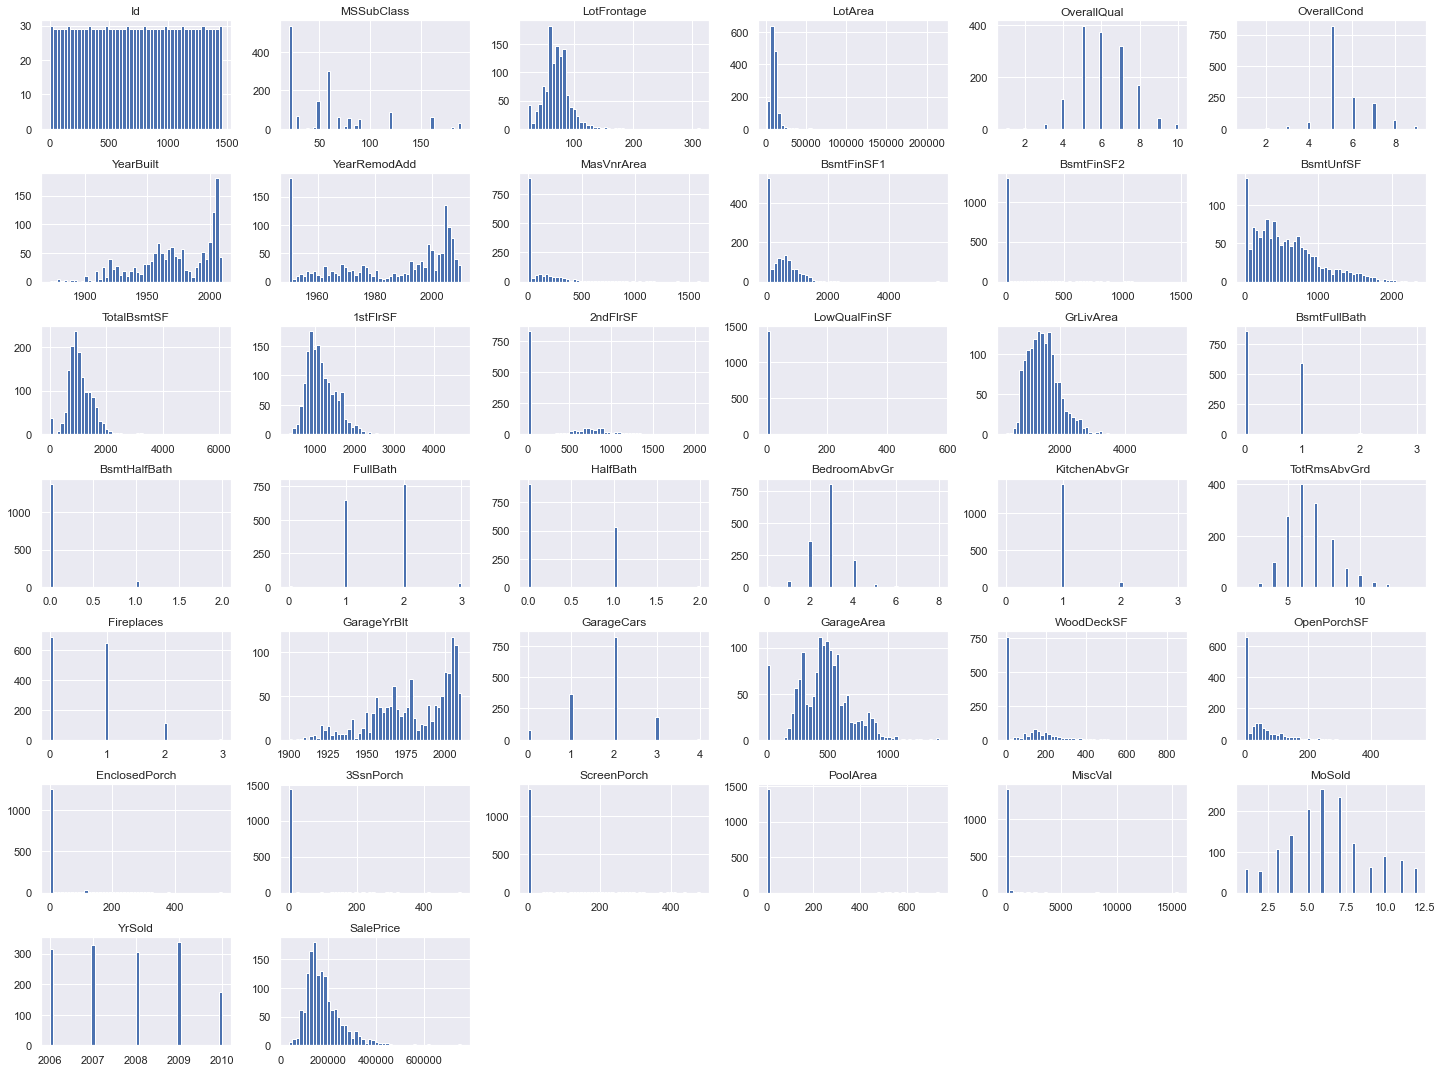

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

#### Second observation: 
A detailed description of each variable can be found in the data_description.txt file in the
[data tab](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)<br>
<b>Id:</b> This is something we don't need, either we can index it or drop it. <br>
The data_description reveals we are dealing with categorical features, though they are not displayed above. <br>
The continous features above reveals, ther are ordinal values, like <b> OverallCond </b>which needs to be handle differently.<br>
<b> SalePrice </b> has long right tails, may be we need to transform to have more Gausian distribution.<br>
<b> Continous features </b> have different scales. It indicades we need to do feature scaling before we feed to our ML models.


In [10]:
# setting index Id
#train_data.set_index('Id',inplace=True)
train_data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

Saving figure Month_and_year_sold_comparision


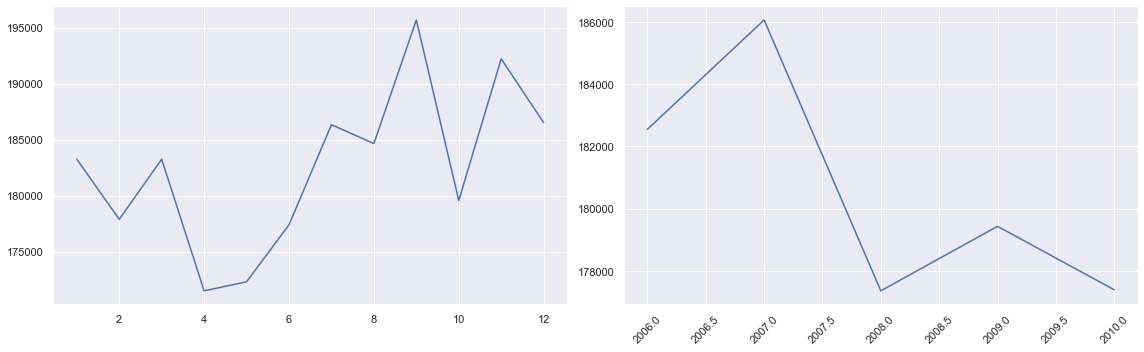

In [11]:
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
plt.plot(train_data.groupby('MoSold').mean()['SalePrice'].astype(int))
fig.add_subplot(1,2,2)
plt.plot(train_data.groupby('YrSold').mean()['SalePrice'].astype(int))
plt.xticks(rotation=45)
save_fig("Month_and_year_sold_comparision")
pass

### Correlation:
#### we will use the standard correlation coefficient aka <font color='brown'>Pearson's r </font>
#### Lets look for correlation to avoid redundant informative features.


In [12]:
corr_matrix = train_data.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

#### Correlation Inference:
Below features show that if they are <font color='red'><b>NOT</b> </font>  in bad shape or <b><i>OverallCond</i></b> is low the <b><i>SalePrice</i></b> tends to go low <br>
BsmtFinSF2      -0.000655 <br>
BsmtHalfBath    -0.024727 <br>
LowQualFinSF    -0.029905 <br>
YrSold          -0.030234 <br>
MiscVal         -0.037137 <br>
OverallCond     -0.077819 <br>
MSSubClass      -0.082548 <br>
EnclosedPorch   -0.116042 <br>
KitchenAbvGr    -0.134007 <br>

Below features show that if they are <font color='green'><b>IN</b> </font> good shape or <b><i>OverallQual</i></b> is high the <b><i>SalePrice</i></b> tends to go high. <br>
OverallQual      0.793990 <br>
GrLivArea        0.731740 <br>
GarageCars       0.654022 <br>
GarageArea       0.640045 <br>
TotalBsmtSF      0.639045 <br>
1stFlrSF         0.616289 <br>
FullBath         0.567586 <br>
TotRmsAbvGrd     0.564707 <br>
YearBuilt        0.534171 <br>
YearRemodAdd     0.523972 <br>

Saving figure scatter_matrix_plot


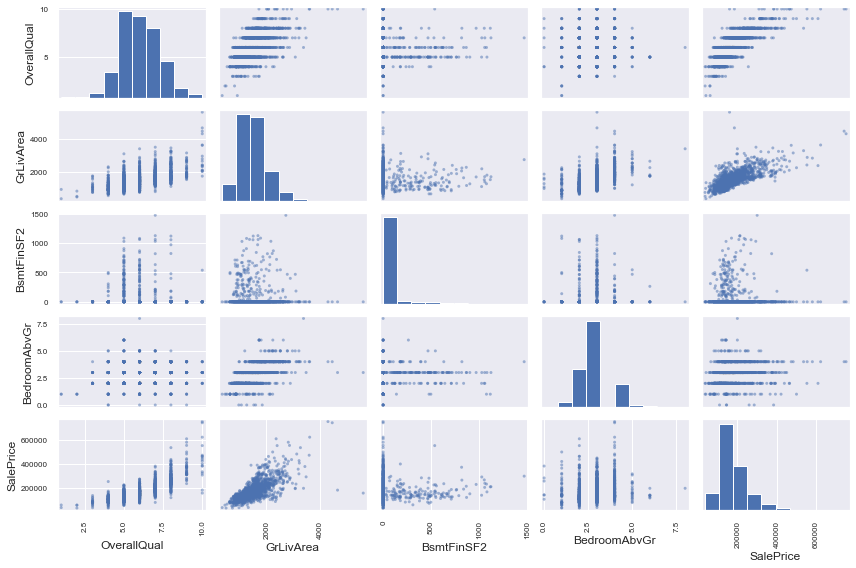

In [13]:
# from pandas.tools.plotting import scatter_matrix
from pandas.plotting import scatter_matrix

attributes = [ "OverallQual", "GrLivArea",
              "BsmtFinSF2","BedroomAbvGr","SalePrice"]
scatter_matrix(train_data[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

#### Correlation Inference II:
GrLivArea: Above grade (ground) living area square feet <br>
It shows that the <b>Sale Price</b> increases as the <b>GrLivArea</b> increases with one outlier. <br>
Also wherever we have <b>GrLivArea</b>sqft more, we find the <b>OveralQual</b> is also...probably to drop such correlated features.

#### SalePrice by Neighborhood

In [14]:
value = round(train_data.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False),0).astype(int)
value

Neighborhood
NoRidge    335295
NridgHt    316271
StoneBr    310499
Timber     242247
Veenker    238773
Somerst    225380
ClearCr    212565
Crawfor    210625
CollgCr    197966
Blmngtn    194871
Gilbert    192855
NWAmes     189050
SawyerW    186556
Mitchel    156270
NAmes      145847
NPkVill    142694
SWISU      142591
Blueste    137500
Sawyer     136793
OldTown    128225
Edwards    128220
BrkSide    124834
BrDale     104494
IDOTRR     100124
MeadowV     98576
Name: SalePrice, dtype: int32

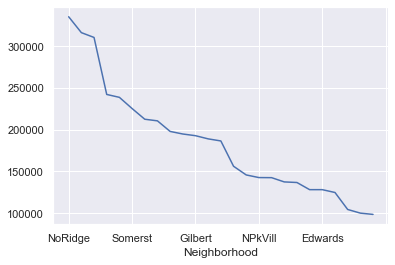

In [15]:
value.plot()
pass

### columns
#### [ To Navigation](#Navigation)

### train data box plot
#### [ To Navigation](#Navigation)


### <font color='brown'><b>Spot cheks : The average Sale price is 150K and beyond 320K are potential outliers: </b></font> 

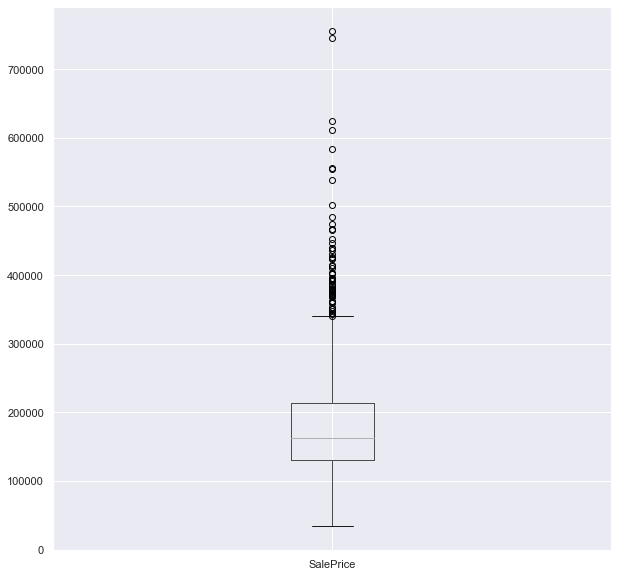

In [16]:
# boxplot to get an idea of average sale price to understand the data
train_data.boxplot(['SalePrice'], figsize=(10, 10))
pass

### <font color='brown'><b>Sale Conditions: The normal home condtions top the list with 964 sales </b></font> 

In [17]:
train_data['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

C:\Users\vasud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


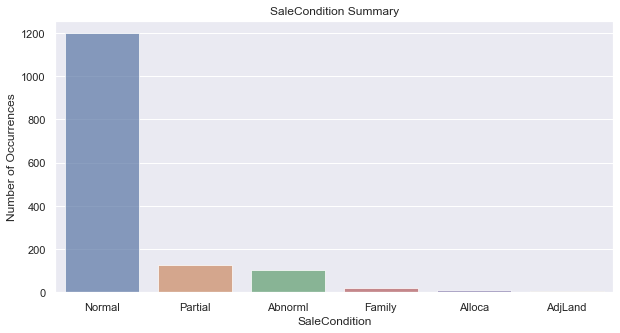

In [18]:
op_count = train_data['SaleCondition'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title('SaleCondition Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('SaleCondition', fontsize=12)
plt.show()
# train_data['SaleCondition'].value_counts().hist()

## Exploratory Data Analysis
#### [ To Navigation](#Navigation)

### File structure
#### [ To Navigation](#Navigation)

In [19]:
# I am commenting this to check whether indexing is causing any problem.

# train_features = train_data.loc[:, train_data.columns != 'SalePrice']
# train_labels = train_data['SalePrice']
# dev_features = dev_data.loc[:, dev_data.columns != 'SalePrice']
# dev_labels = dev_data['SalePrice']
# test_features = orginal_test_data.loc[:, orginal_test_data.columns != 'SalePrice']

train_features = train_data.loc[:, train_data.columns]
train_labels = train_data['SalePrice']
# dev_features = dev_data.loc[:, dev_data.columns]
# dev_labels = dev_data['SalePrice']
test_features = orginal_test_data.loc[:, orginal_test_data.columns != 'SalePrice']


# #output
# y= housing.median_income

# #input
# x=housing.drop('median_income',axis=1)

#splitting
#x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# #printing shapes of testing and training sets :
print("train data columns:", train_data.shape[1])
print("train features", train_features.shape[1])
#print("dev features", dev_features.shape[1])
print("test features", test_features.shape[1])

train data columns: 81
train features 81
test features 80


## Feature Engineering
#### FE : 1.1 Data Cleaning and Datasets based on dtype.
we have: <br>
object     43 <br>
int64      34 <br>
float64     3 <br>
Lets split the data for more exploratory analysis based on text and integer(Categorical & Ordinal)
#### [ To Navigation](#Navigation)

In [20]:
train_data.dtypes.value_counts(dropna=False)

object     43
int64      35
float64     3
dtype: int64

In [21]:
# Look at "int64" and "float64" data type, and validate
num_train = train_features.select_dtypes(include=['int64', 'float64']).copy()
print(num_train.columns)
num_train.head()


Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [22]:
# Look at object data type, potentially these are categorical variable, but to look into further
obj_train = train_features.select_dtypes(include=['object']).copy()
print(obj_train.columns)
obj_train.head(20)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1        RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   
5        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
6        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
7        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
8        RM   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
9        RL   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
10       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
11       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
12       RL   Pave   NaN      IR2         Lvl    AllPub    Inside       Gtl   
13       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
14       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
15       RM   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
16       RL   Pave   NaN      IR1         Lvl    AllPub   CulDSac       Gtl   
17       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
18       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
19       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

   Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0       CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1       Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2       CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3       Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4       NoRidge       Norm  ...     Attchd          RFn         TA         TA   
5       Mitchel       Norm  ...     Attchd          Unf         TA         TA   
6       Somerst       Norm  ...     Attchd          RFn         TA         TA   
7        NWAmes       PosN  ...     Attchd          RFn         TA         TA   
8       OldTown     Artery  ...     Detchd          Unf         Fa         TA   
9       BrkSide     Artery  ...     Attchd          RFn         Gd         TA   
10       Sawyer       Norm  ...     Detchd          Unf         TA         TA   
11      NridgHt       Norm  ...    BuiltIn          Fin         TA         TA   
12       Sawyer       Norm  ...     Detchd          Unf         TA         TA   
13      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
14        NAmes       Norm  ...     Attchd          RFn         TA         TA   
15      BrkSide       Norm  ...     Detchd          Unf         TA         TA   
16        NAmes       Norm  ...     Attchd          Fin         TA         TA   
17       Sawyer       Norm  ...    CarPort          Unf         TA         TA   
18      SawyerW       RRAe  ...     Detchd          Unf         TA         TA   
19        NAmes       Norm  ...     Attchd          Unf         TA         TA   

   PavedDrive PoolQC  Fence MiscFeature SaleType SaleCondition  
0           Y    NaN    NaN         NaN       WD        Normal  
1           Y    NaN    NaN         NaN       WD        Normal  
2           Y    NaN    NaN         NaN       WD        Normal  
3           Y    NaN    NaN         NaN       WD       Abnorml  
4           Y    NaN    NaN         NaN       WD        Normal  
5           Y    NaN  MnPrv        Shed       WD        Normal  
6           Y    NaN    NaN         NaN       WD        Normal  
7           Y    NaN    NaN        Shed       WD        Normal  
8           Y    NaN    NaN         NaN       WD       A

#### FE : 1.2 Imputation
###### Fit the Imputer instance to the numerical train data

In [23]:
# Lets fit the Imputator instance to the training data using the fit() method.
imputer_median = SimpleImputer(strategy="median")
imputer_median.fit(num_train)
print("We can compare the Imputer output versus the manual median calculation. They look good!!!")
print(imputer_median.statistics_)
num_train.median().values
print("\nWe are ready to deploy the Trained Imputer to transform the missing numericals to median and into a dataframe")

We can compare the Imputer output versus the manual median calculation. They look good!!!
[7.3050e+02 5.0000e+01 6.9000e+01 9.4785e+03 6.0000e+00 5.0000e+00
 1.9730e+03 1.9940e+03 0.0000e+00 3.8350e+02 0.0000e+00 4.7750e+02
 9.9150e+02 1.0870e+03 0.0000e+00 0.0000e+00 1.4640e+03 0.0000e+00
 0.0000e+00 2.0000e+00 0.0000e+00 3.0000e+00 1.0000e+00 6.0000e+00
 1.0000e+00 1.9800e+03 2.0000e+00 4.8000e+02 0.0000e+00 2.5000e+01
 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 6.0000e+00
 2.0080e+03 1.6300e+05]

We are ready to deploy the Trained Imputer to transform the missing numericals to median and into a dataframe


In [24]:
num_train.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [25]:
temp = imputer_median.transform(num_train)
num_train_imp = pd.DataFrame(temp, columns=num_train.columns,index=num_train.index)
num_train_imp.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0  1.0        60.0         65.0   8450.0          7.0          5.0     2003.0   
1  2.0        20.0         80.0   9600.0          6.0          8.0     1976.0   
2  3.0        60.0         68.0  11250.0          7.0          5.0     2001.0   
3  4.0        70.0         60.0   9550.0          7.0          5.0     1915.0   
4  5.0        60.0         84.0  14260.0          8.0          5.0     2000.0   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0        2003.0       196.0       706.0  ...         0.0         61.0   
1        1976.0         0.0       978.0  ...       298.0          0.0   
2        2002.0       162.0       486.0  ...         0.0         42.0   
3        1970.0         0.0       216.0  ...         0.0         35.0   
4        2000.0       350.0       655.0  ...       192.0         84.0   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0            0.0        0.0          0.0       0.0      0.0     2.0  2008.0   
1            0.0        0.0          0.0       0.0      0.0     5.0  2007.0   
2            0.0        0.0          0.0       0.0      0.0     9.0  2008.0   
3          272.0        0.0          0.0       0.0      0.0     2.0  2006.0   
4            0.0        0.0          0.0       0.0      0.0    12.0  2008.0   

   SalePrice  
0   208500.0  
1   181500.0  
2   223500.0  
3   140000.0  
4   250000.0  

[5 rows x 38 columns]

#### Plot Numerical data along with SalePrice

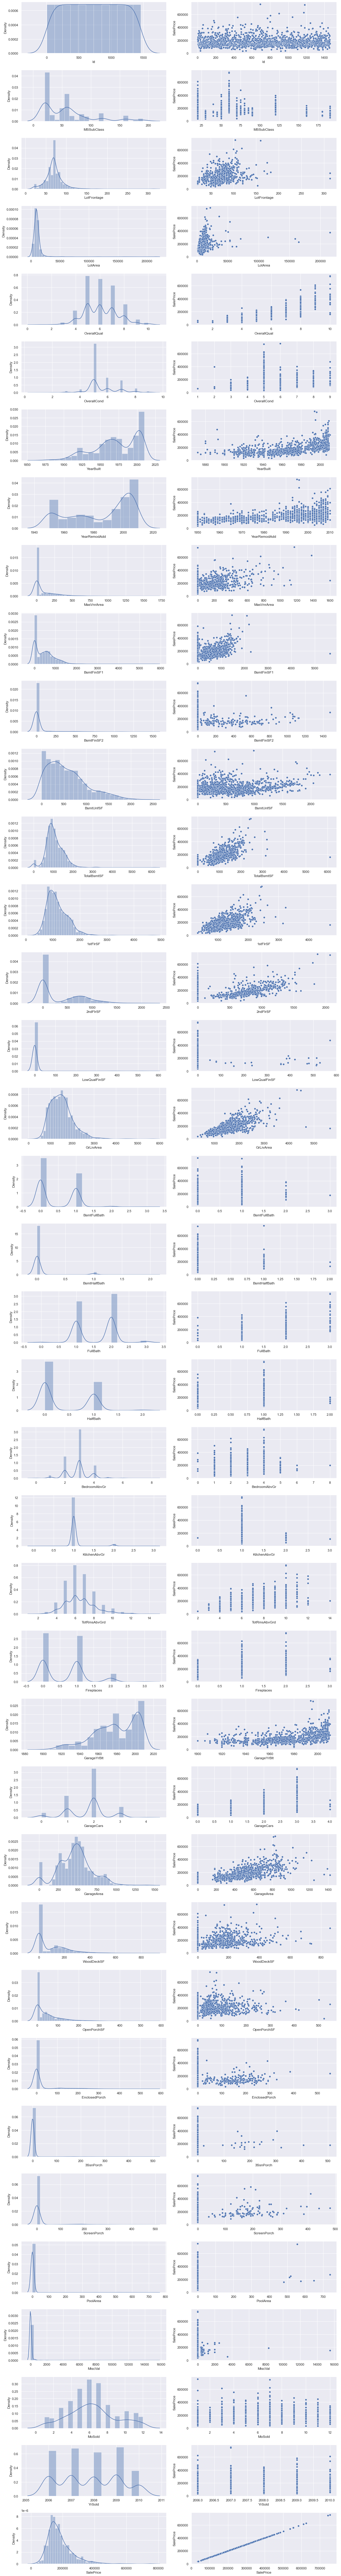

In [26]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16, 120),tight_layout=True)
for idx, f in enumerate(num_train_imp):
    plt.subplot(num_train_imp.shape[1], 2, 2*idx+1)
    sns.distplot(num_train_imp[f]) # since we imputed we don't need to verify for na's
    plt.subplot(num_train_imp.shape[1], 2, 2*idx+2)
    sns.scatterplot(x=f, y=train_data['SalePrice'], data=num_train_imp)

#### FE: 1.3 Categorical
###### Lets leverage OrdinalEncoder

In [27]:
obj_train.head()

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
0       RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
1       RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
2       RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
3       RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
4       RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

  Neighborhood Condition1  ... GarageType GarageFinish GarageQual GarageCond  \
0      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
1      Veenker      Feedr  ...     Attchd          RFn         TA         TA   
2      CollgCr       Norm  ...     Attchd          RFn         TA         TA   
3      Crawfor       Norm  ...     Detchd          Unf         TA         TA   
4      NoRidge       Norm  ...     Attchd          RFn         TA         TA   

  PavedDrive PoolQC Fence MiscFeature SaleType SaleCondition  
0          Y    NaN   NaN         NaN       WD        Normal  
1          Y    NaN   NaN         NaN       WD        Normal  
2          Y    NaN   NaN         NaN       WD        Normal  
3          Y    NaN   NaN         NaN       WD       Abnorml  
4          Y    NaN   NaN         NaN       WD        Normal  

[5 rows x 43 columns]

#### Plot Categorical data along with SalePrice

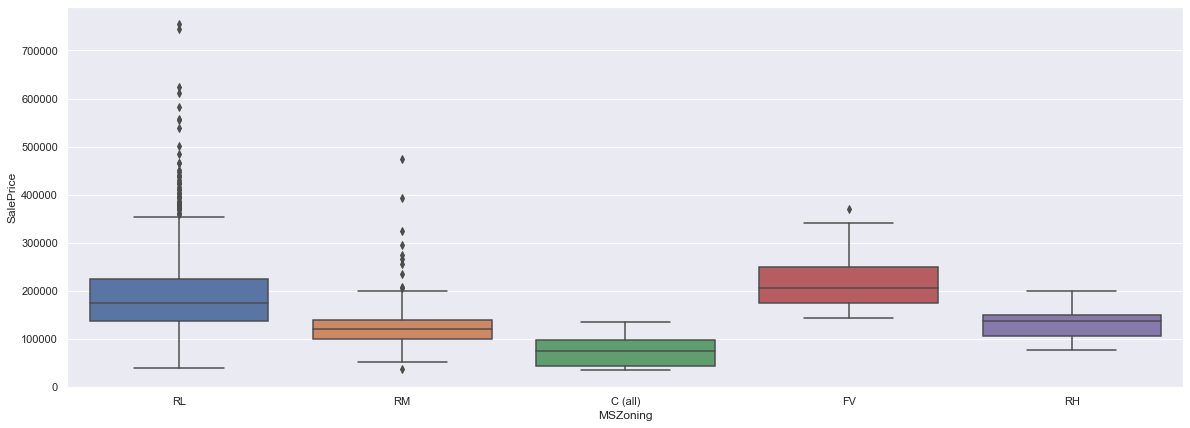

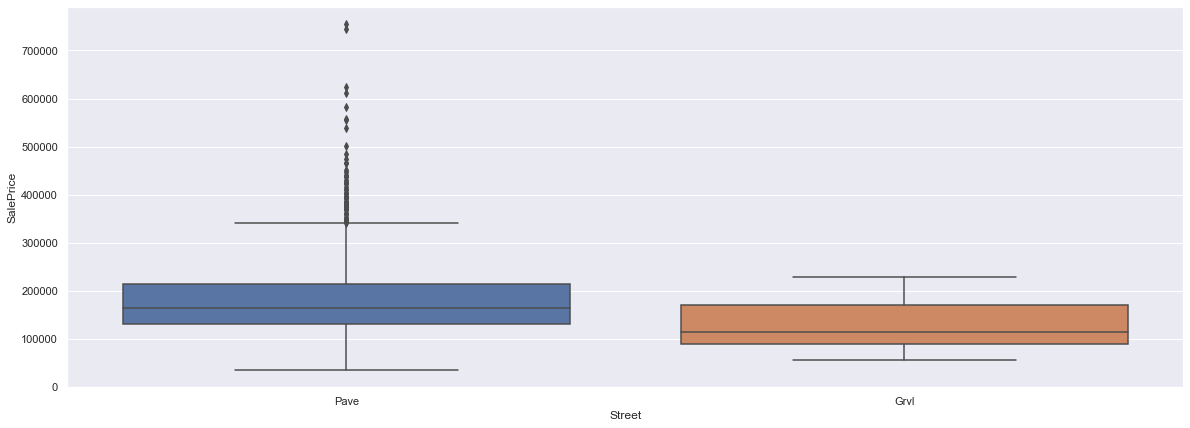

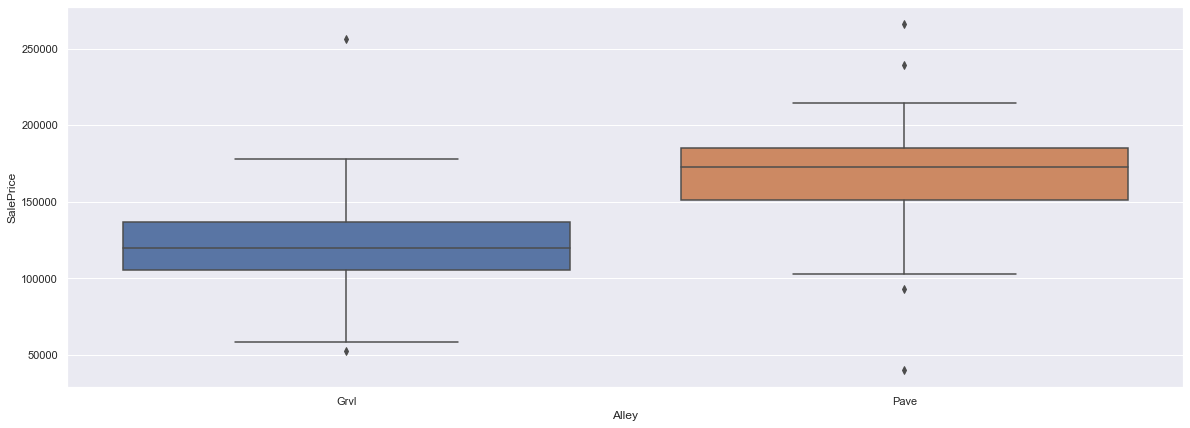

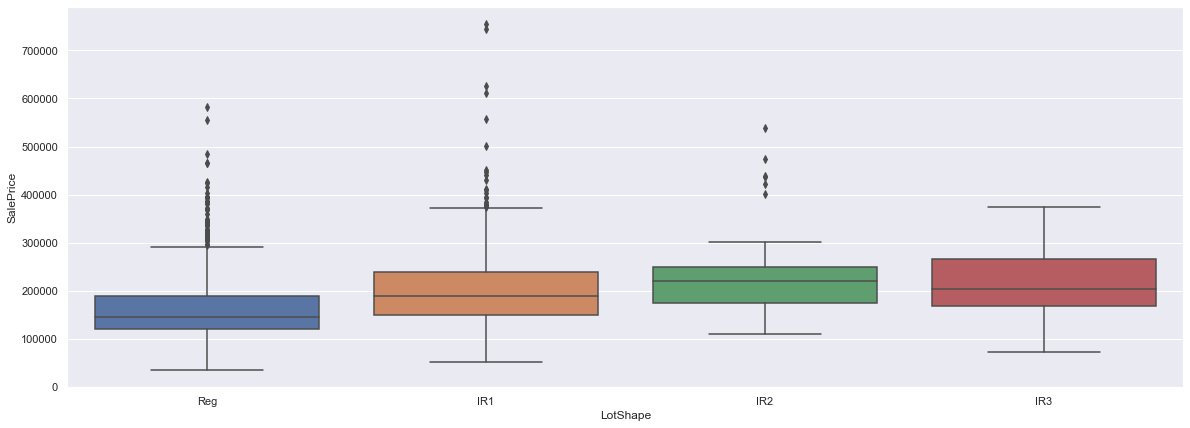

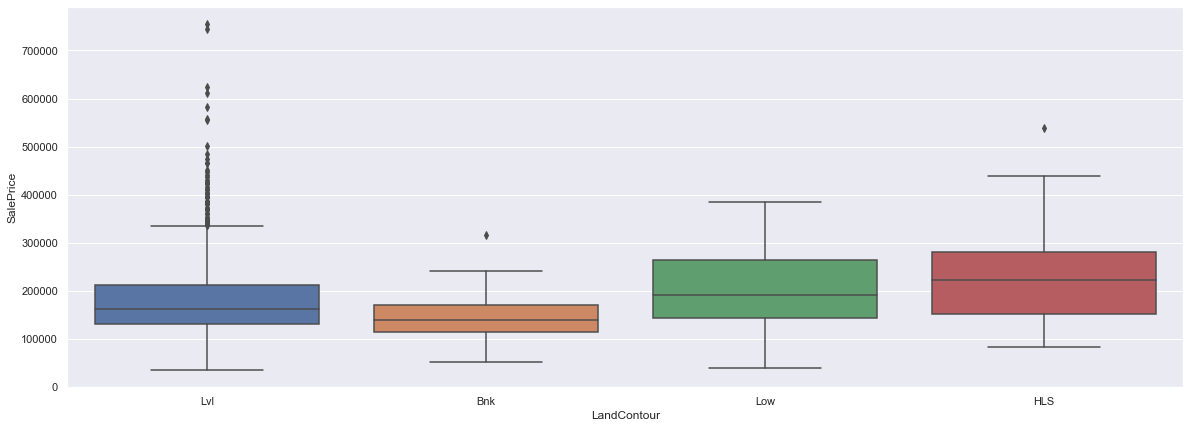

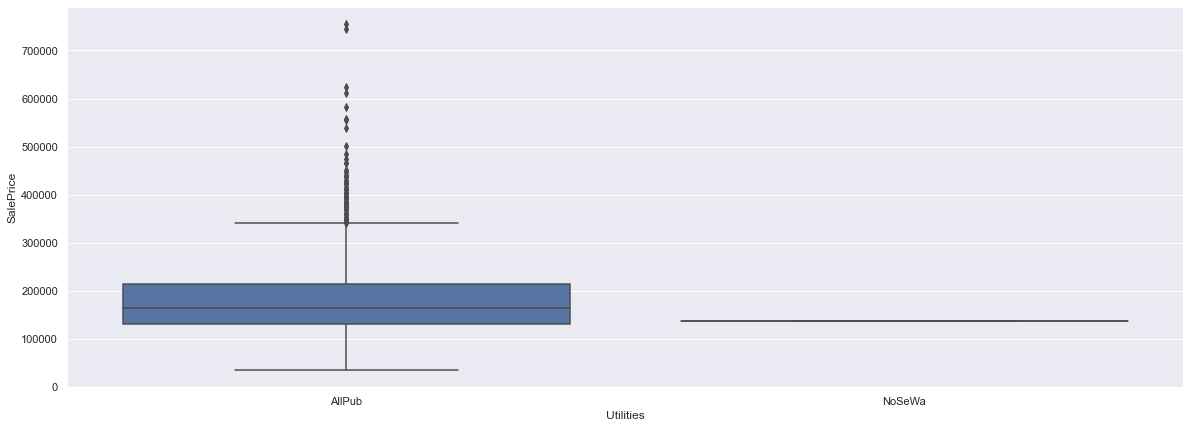

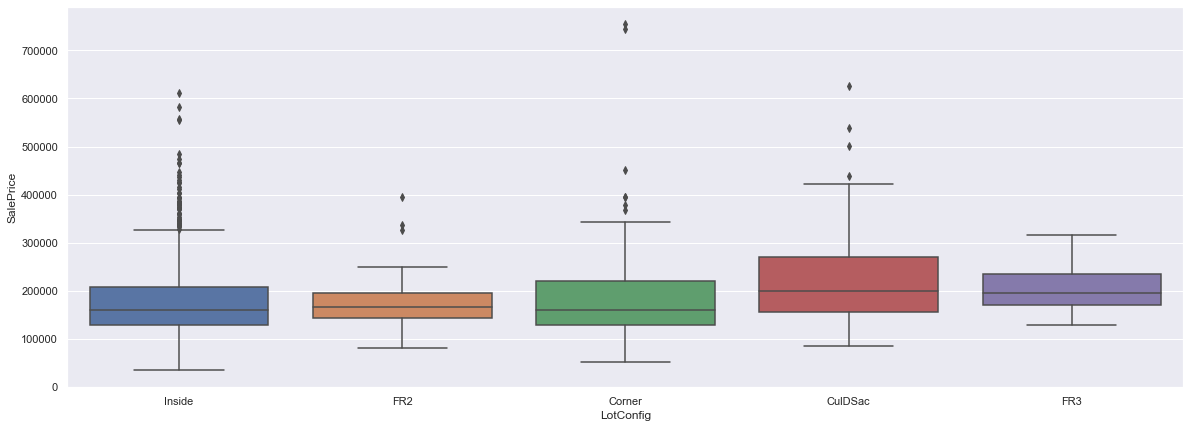

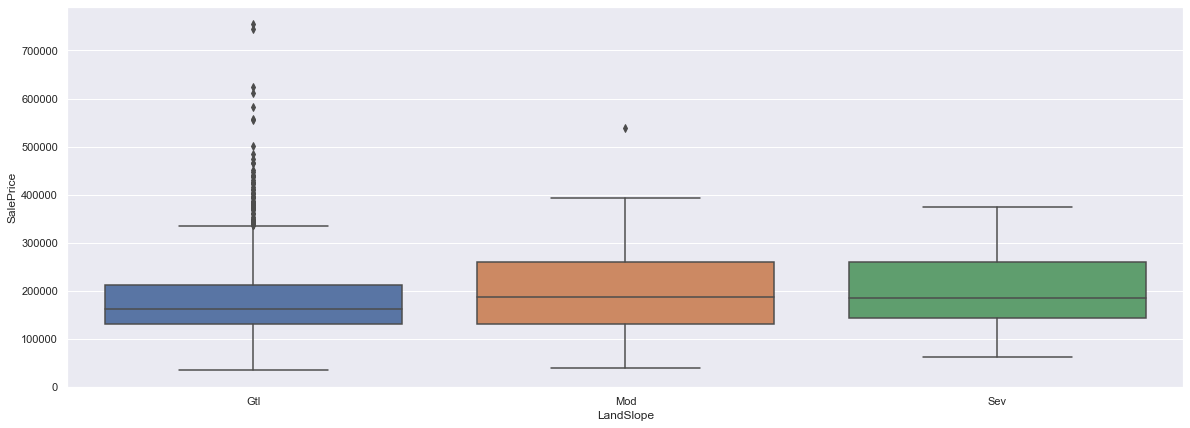

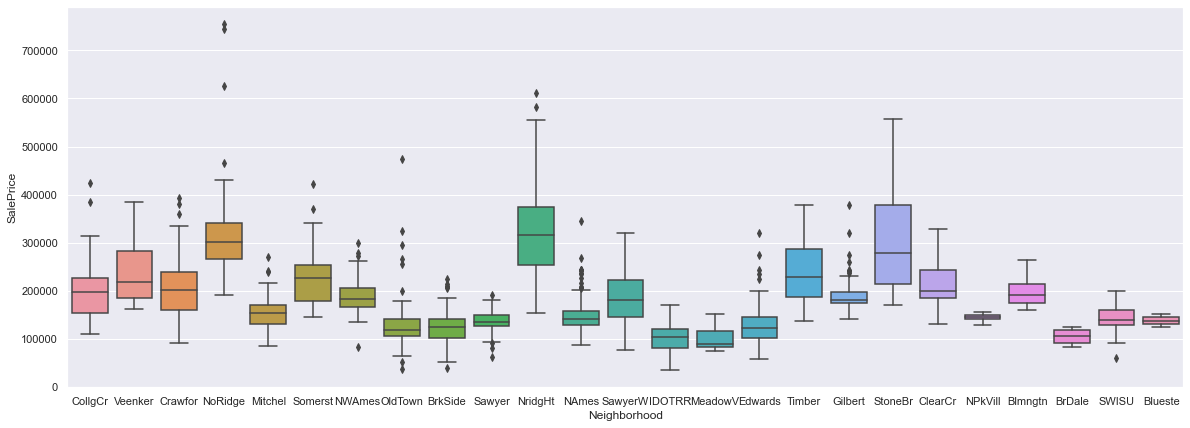

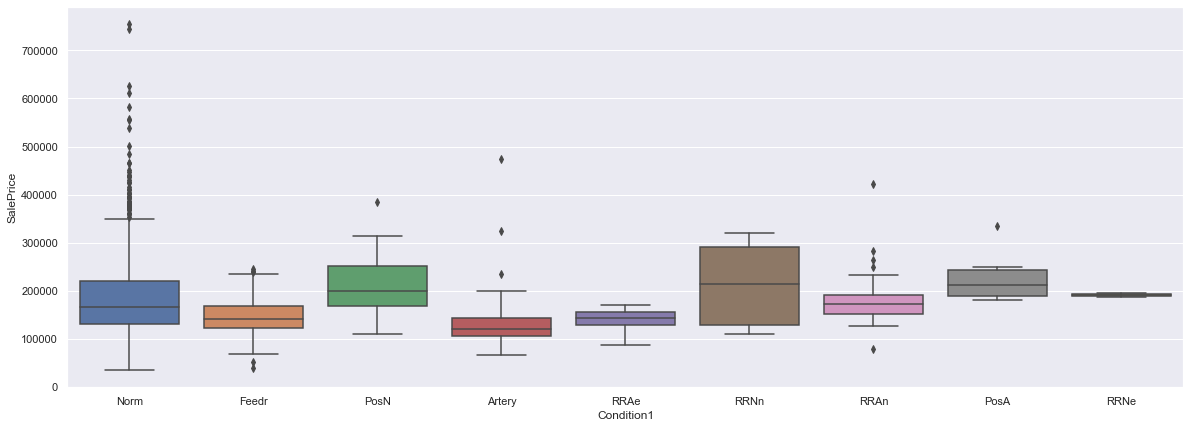

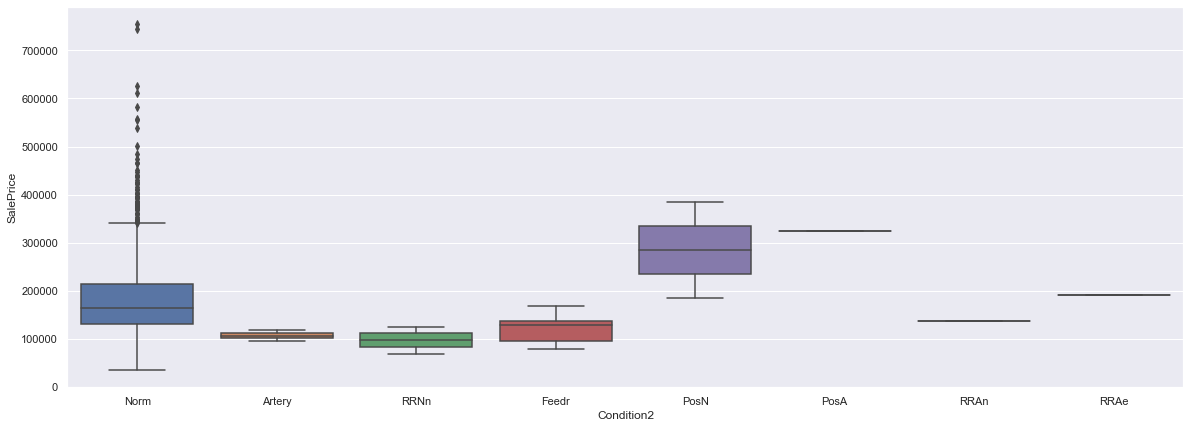

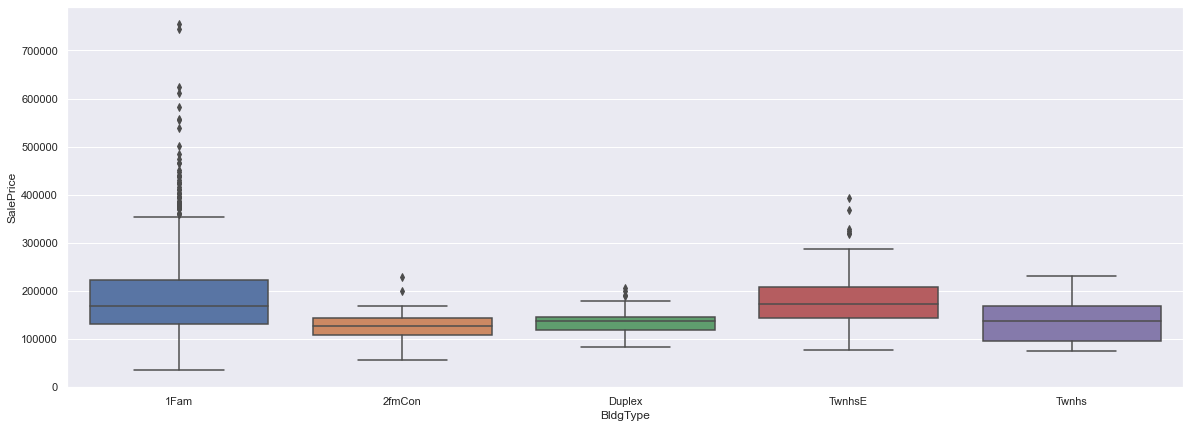

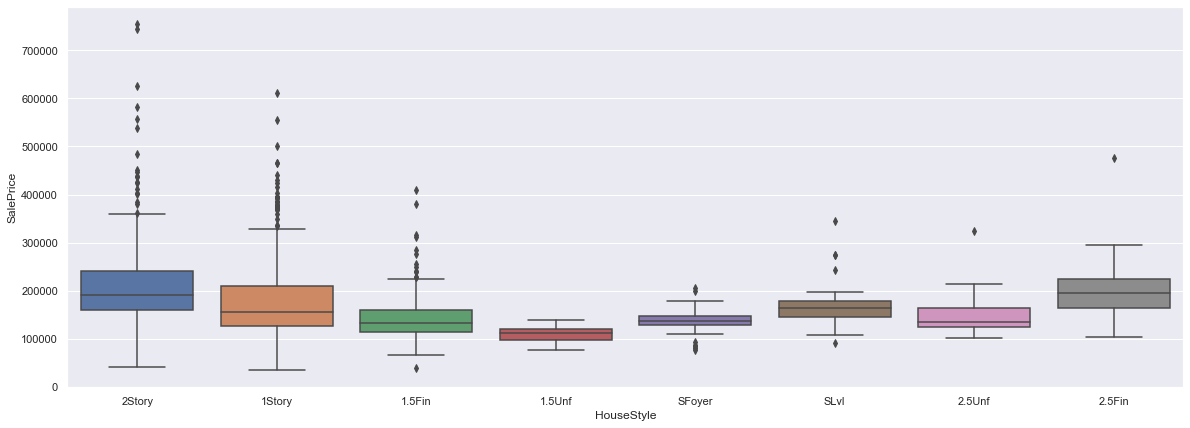

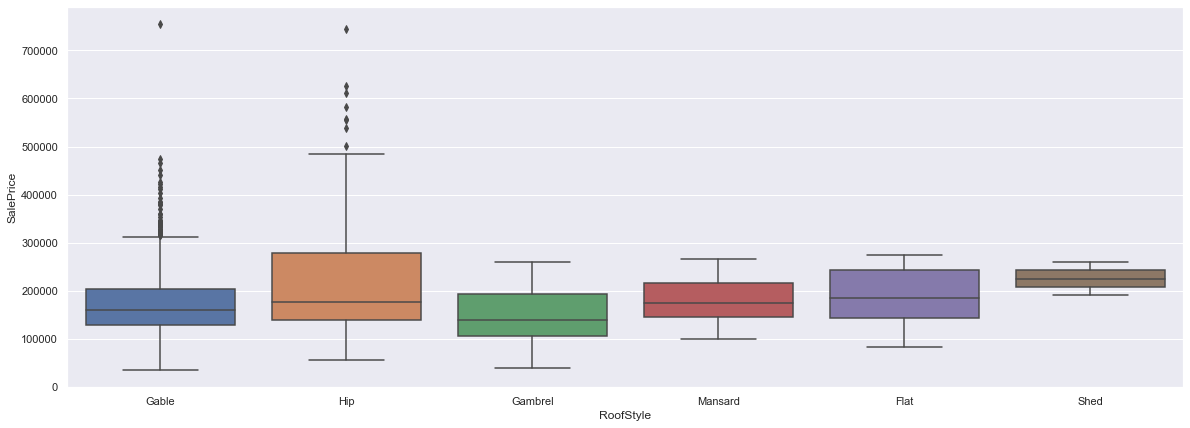

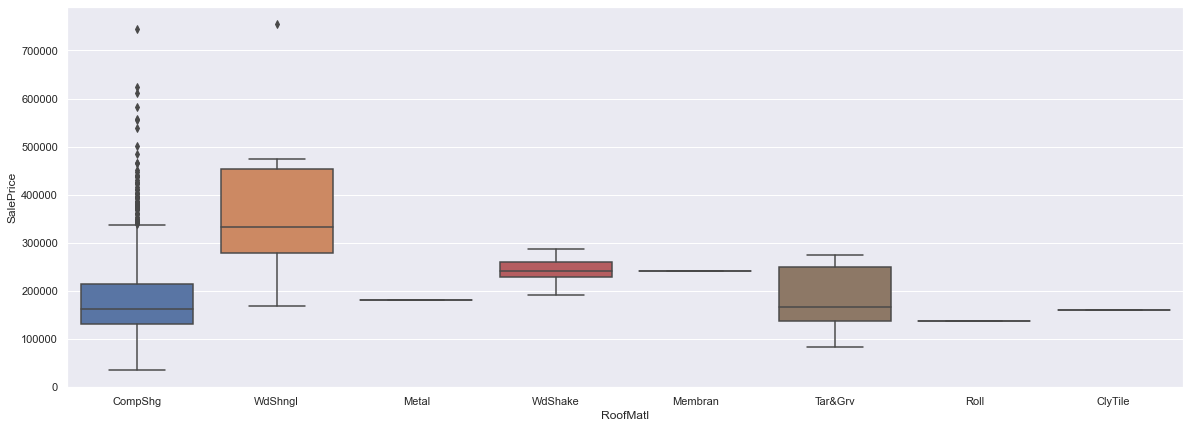

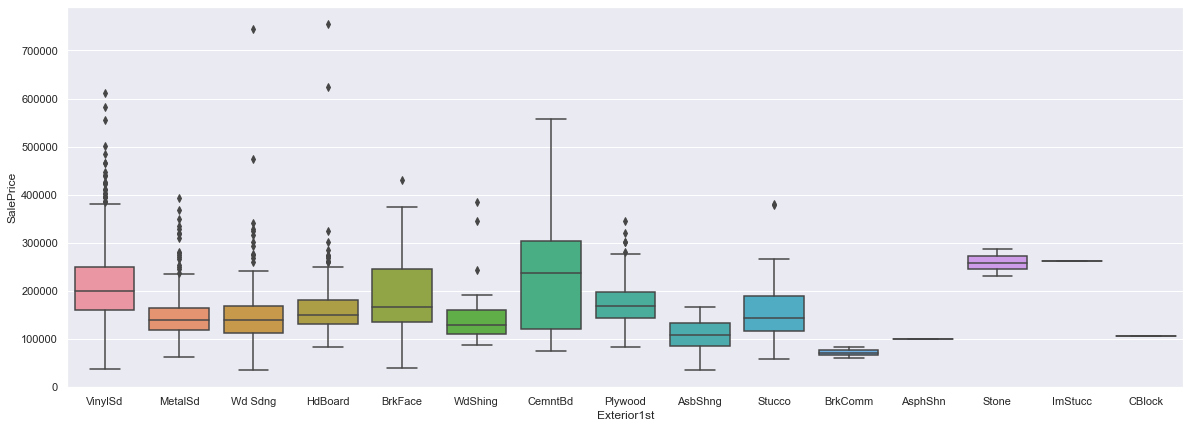

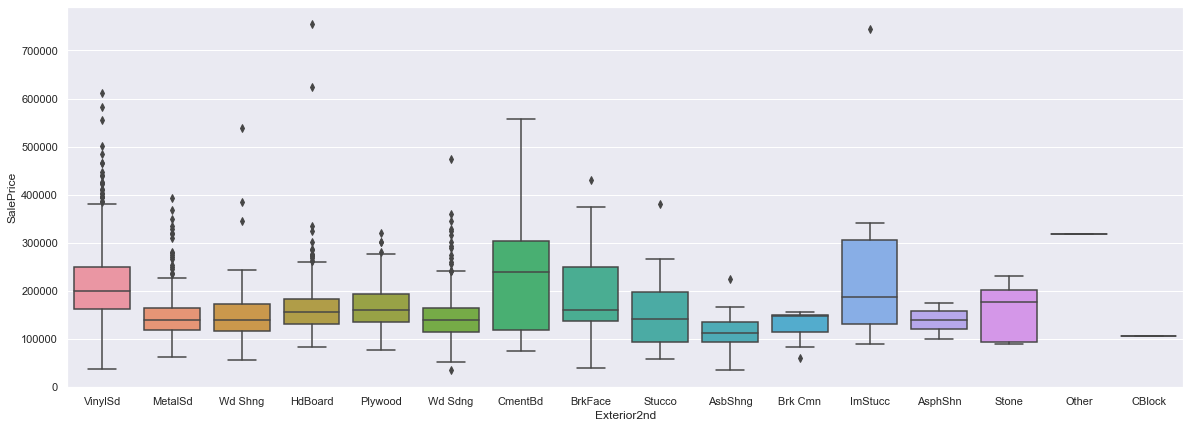

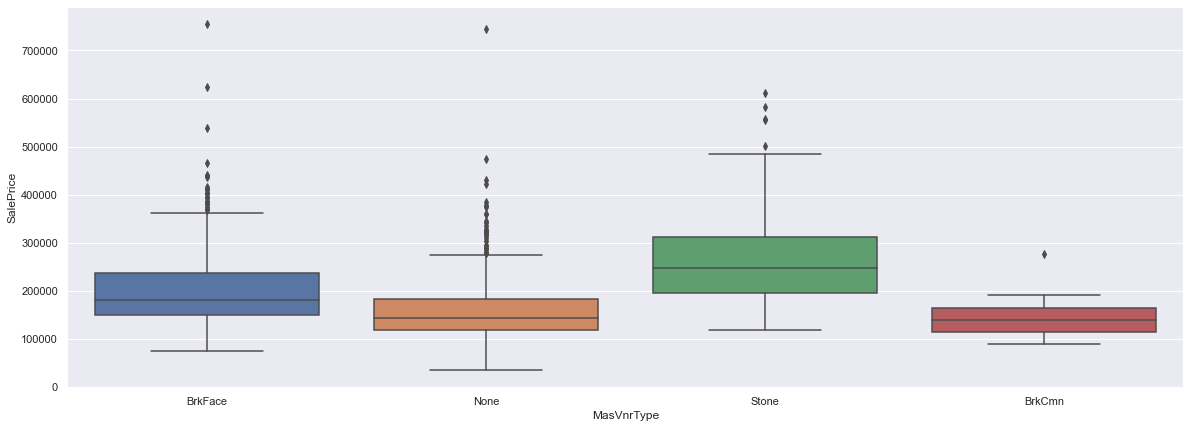

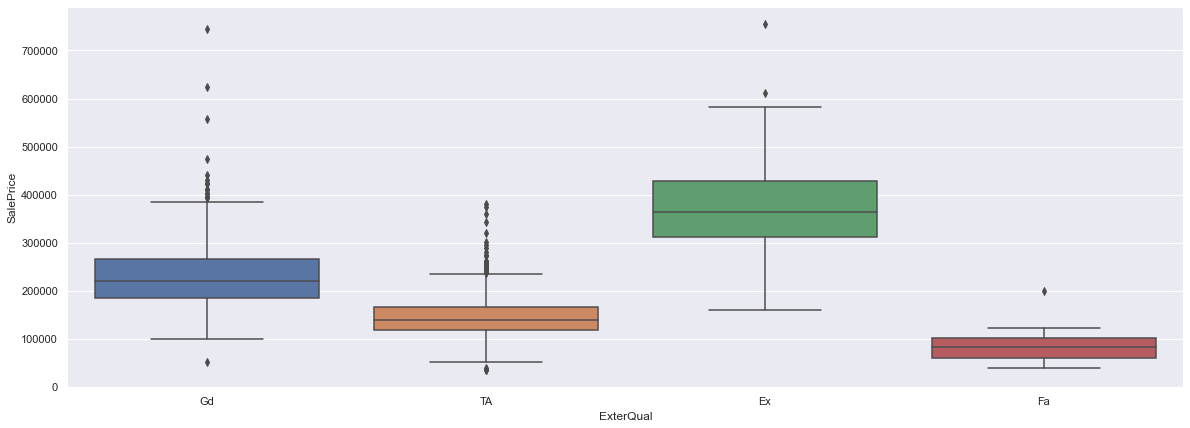

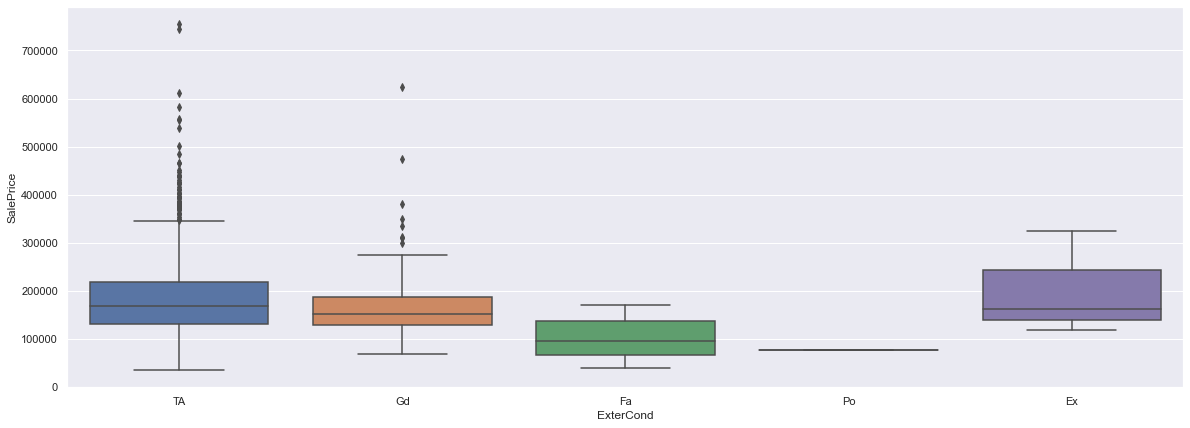

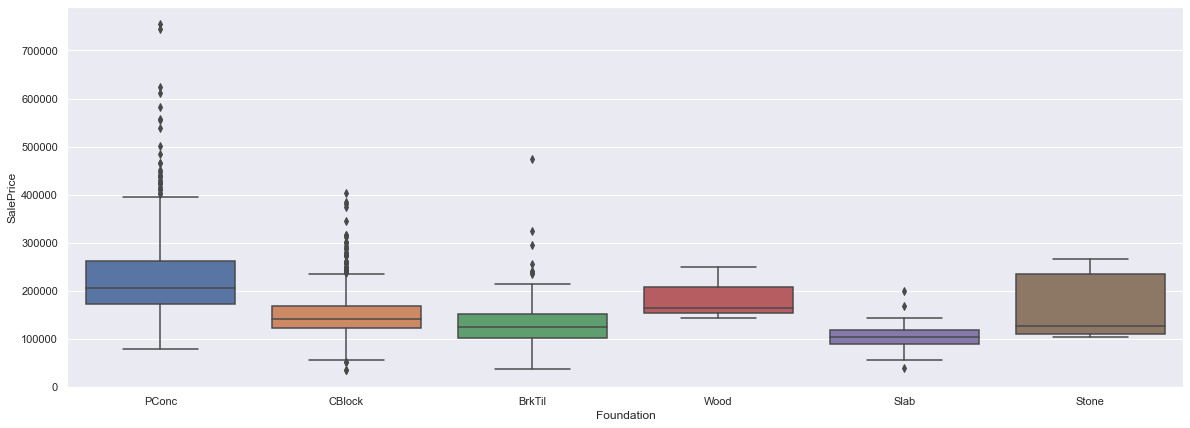

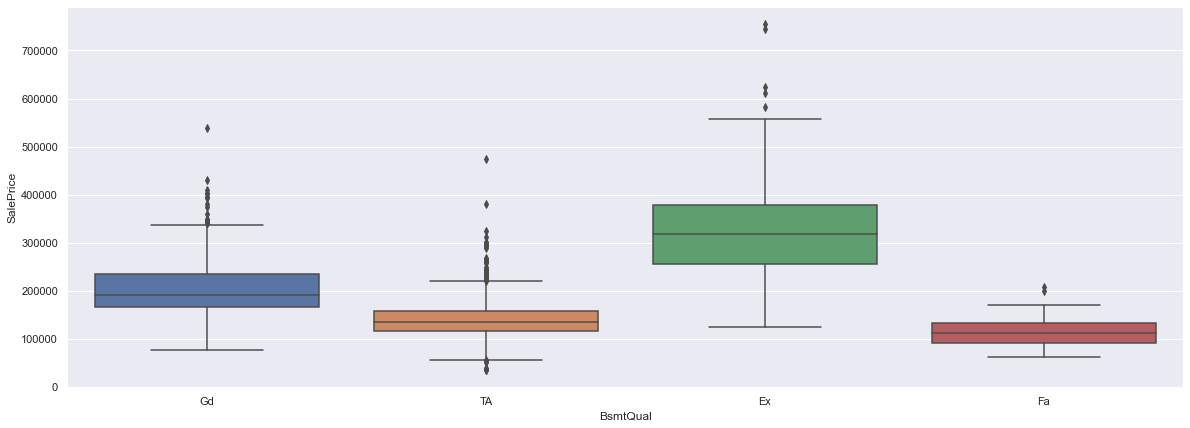

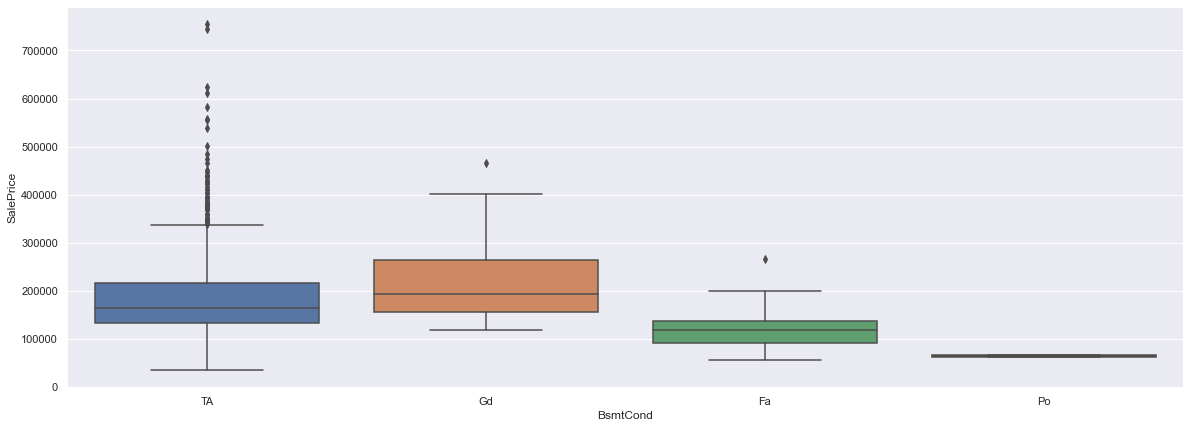

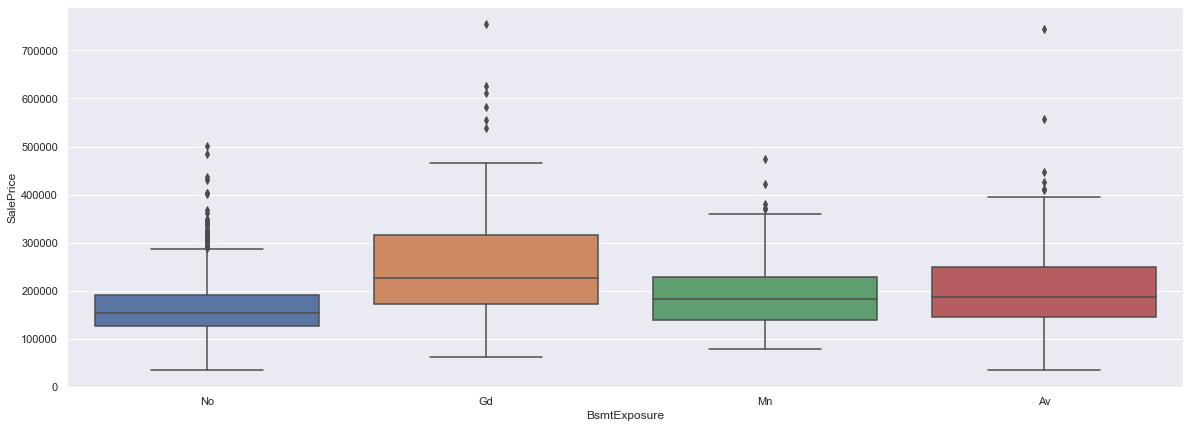

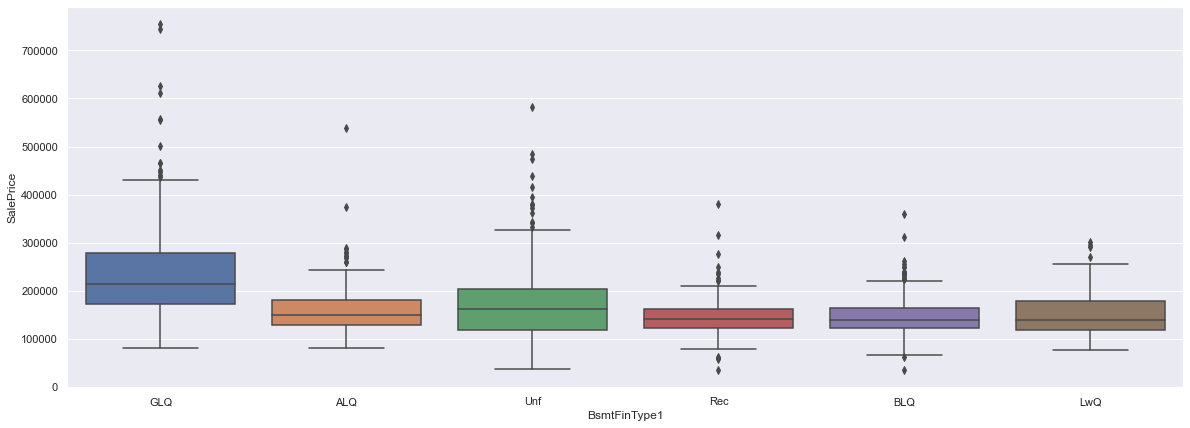

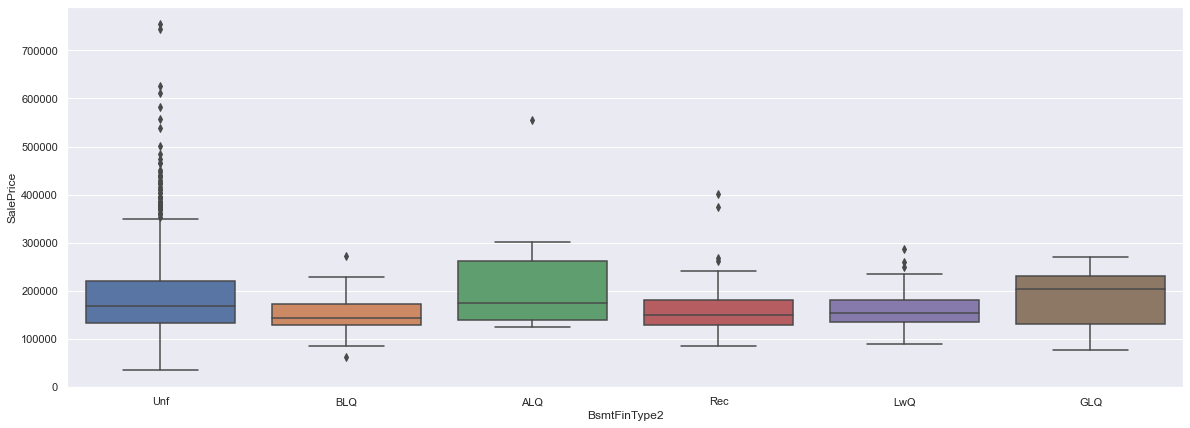

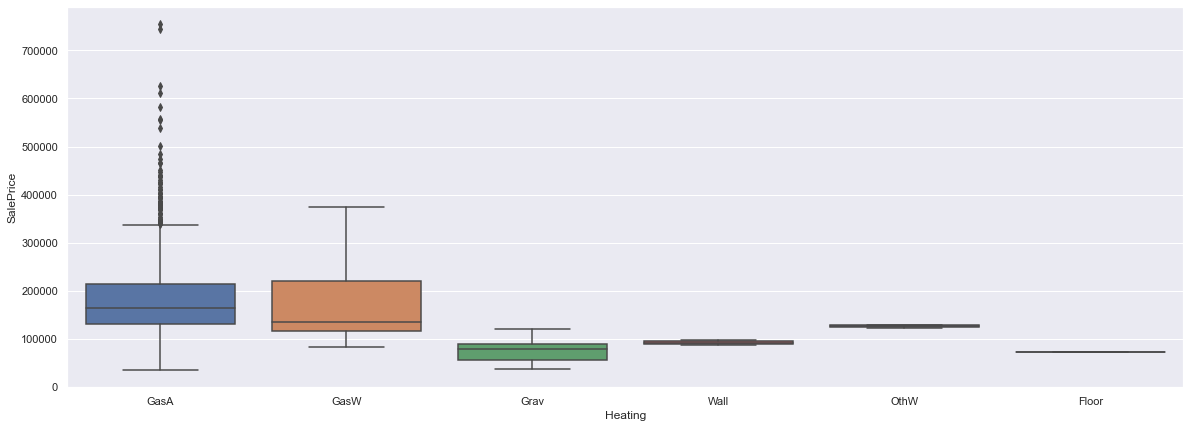

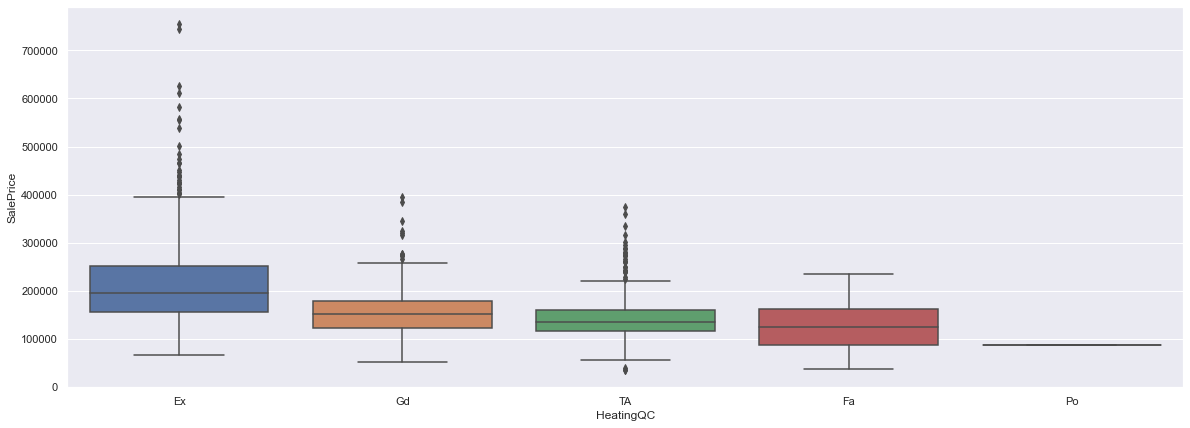

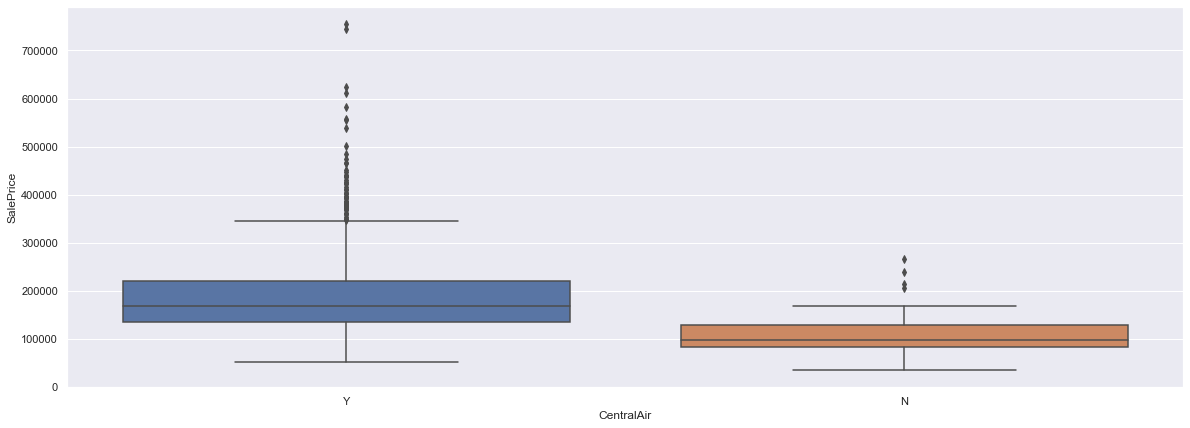

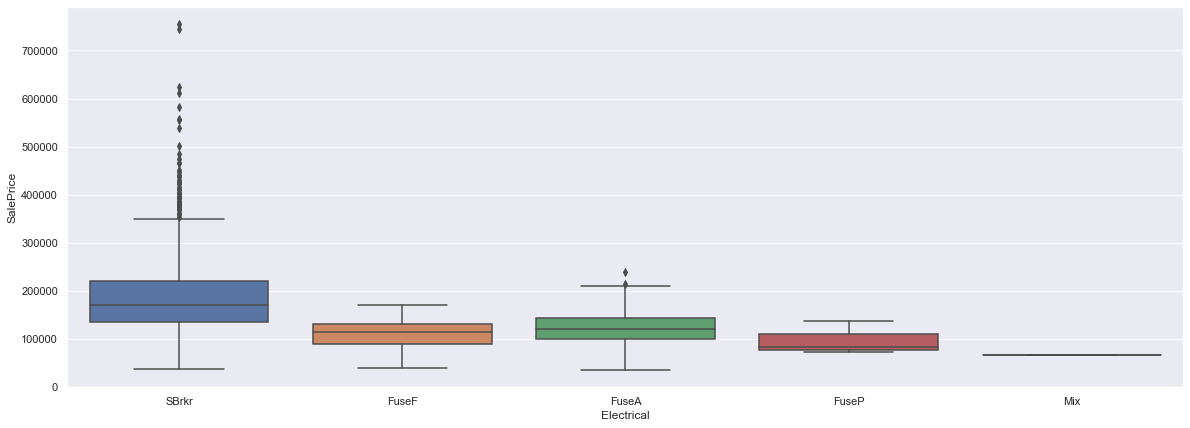

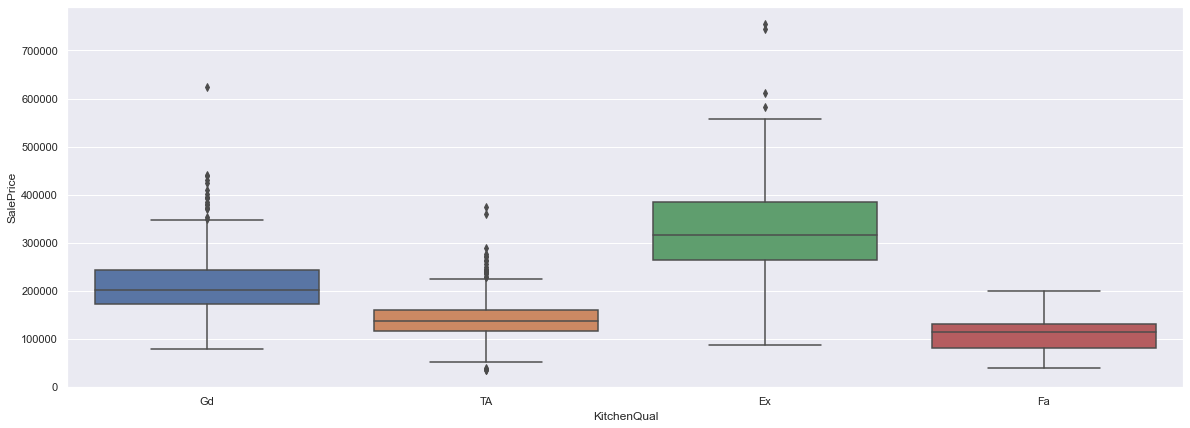

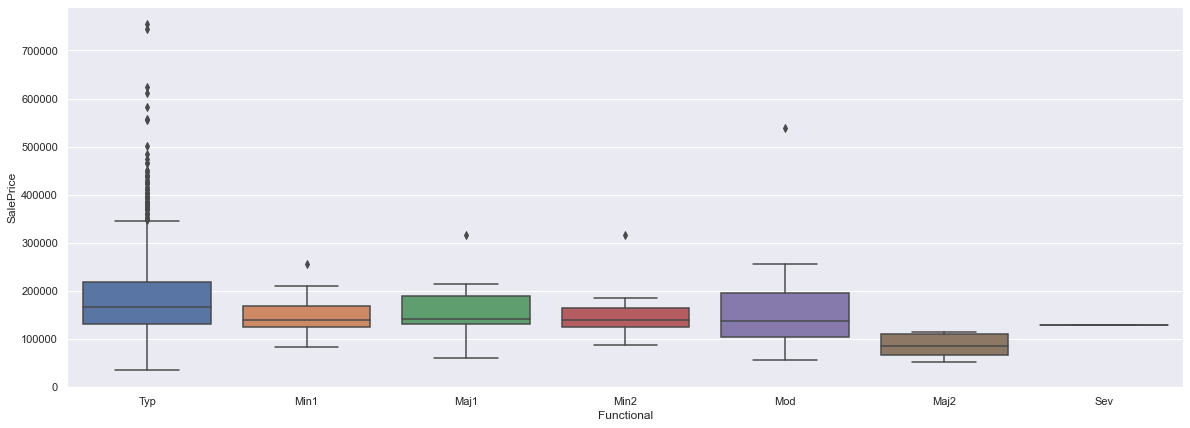

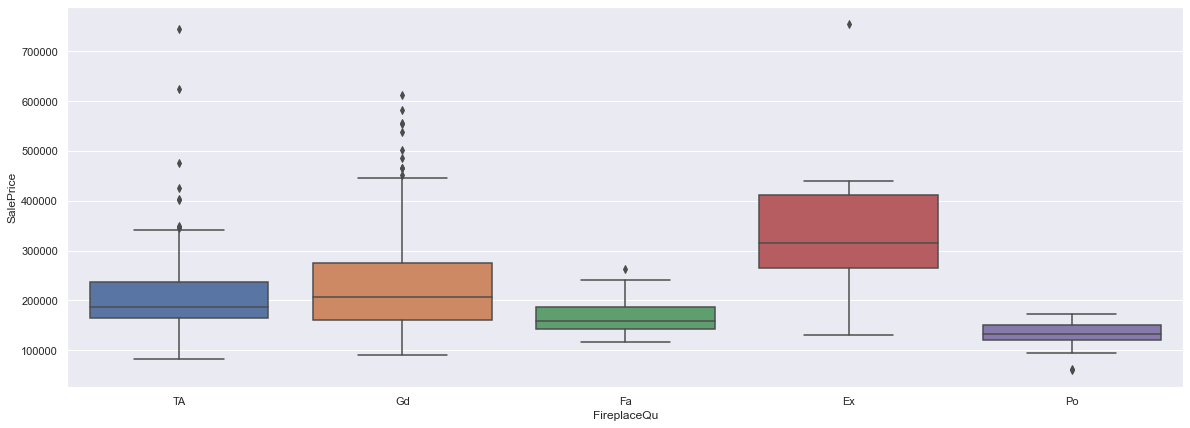

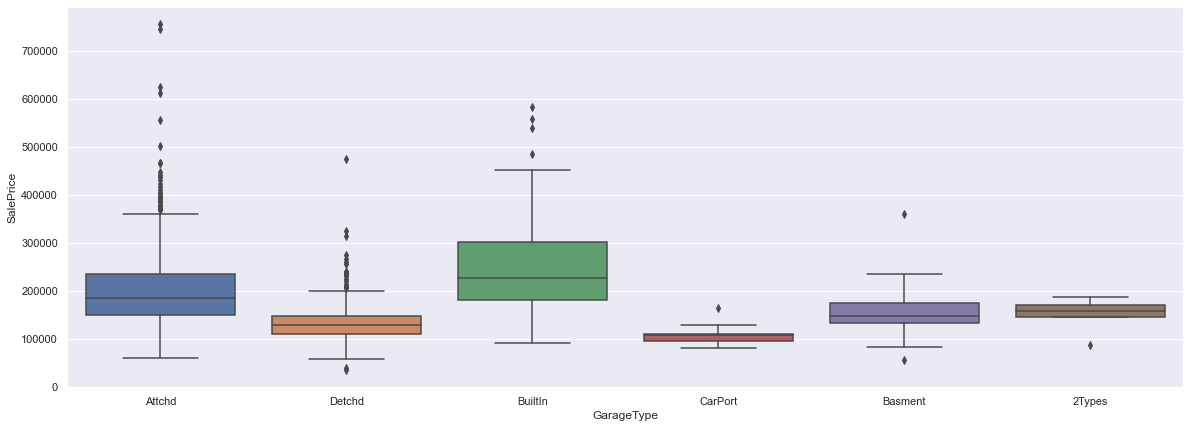

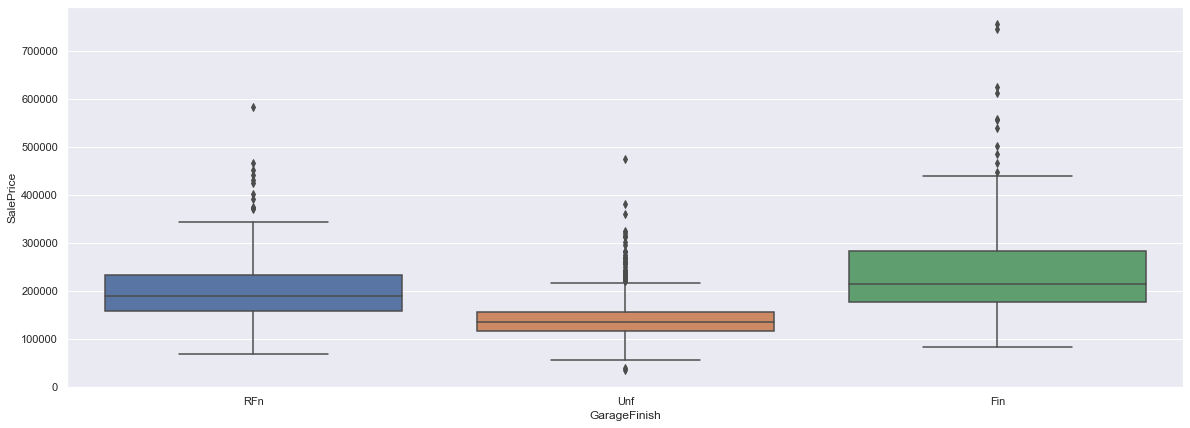

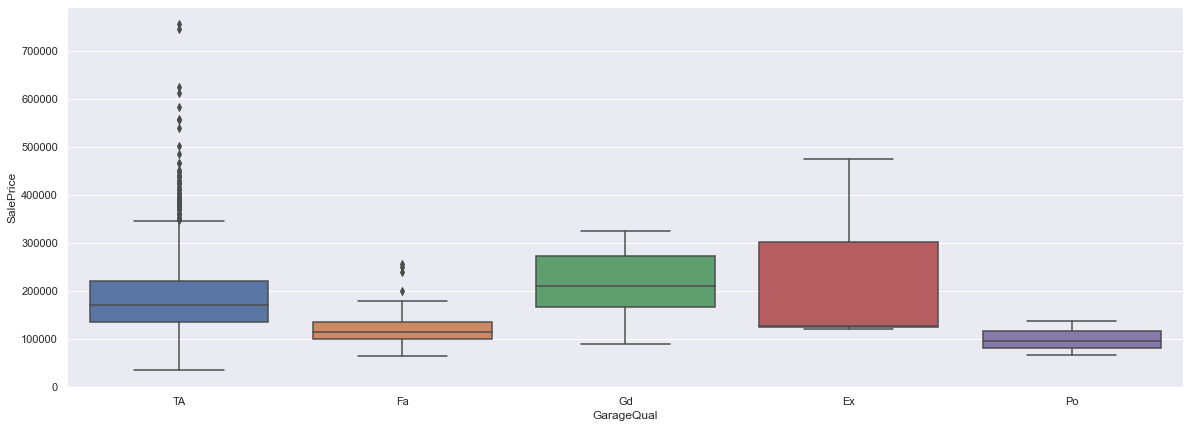

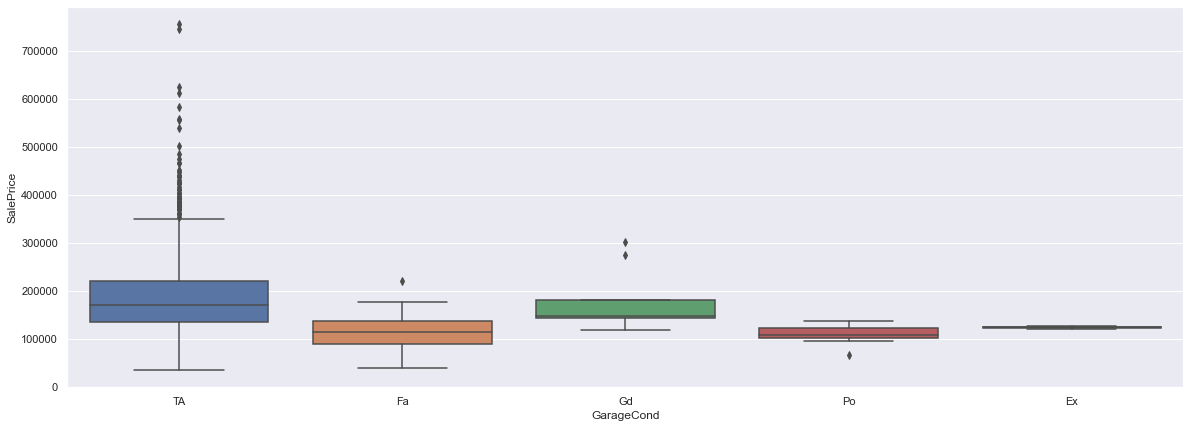

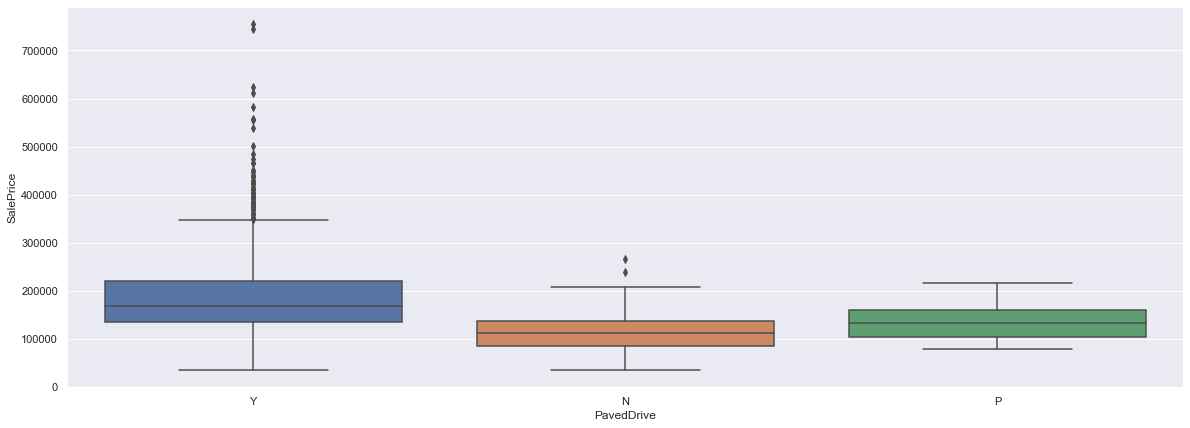

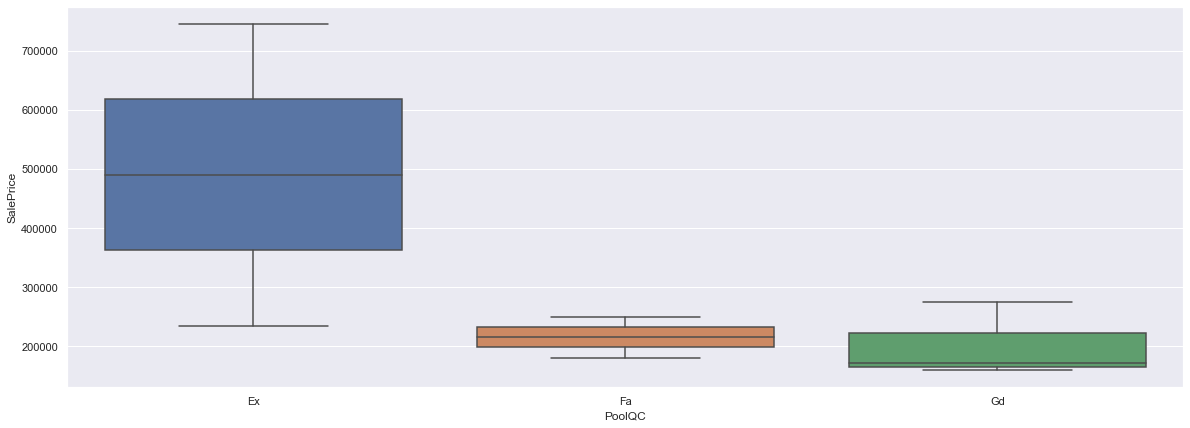

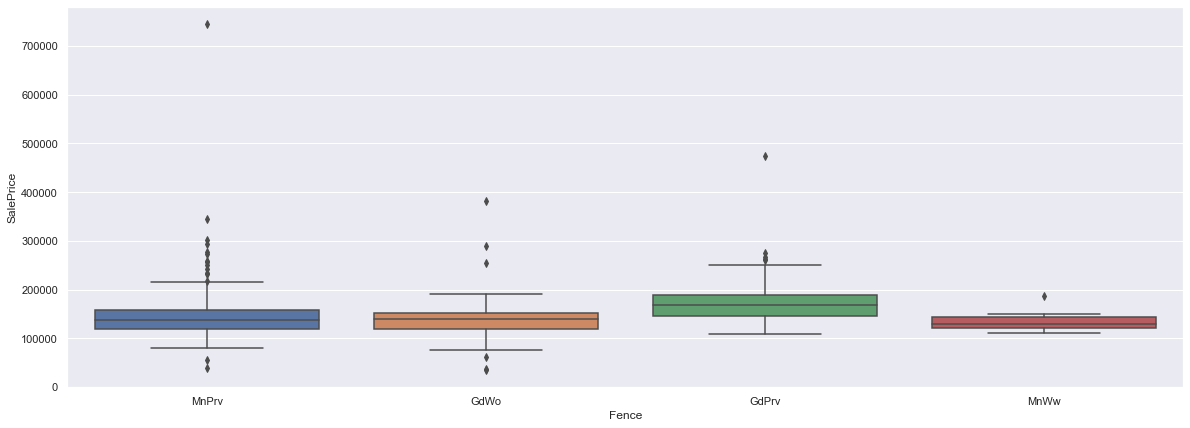

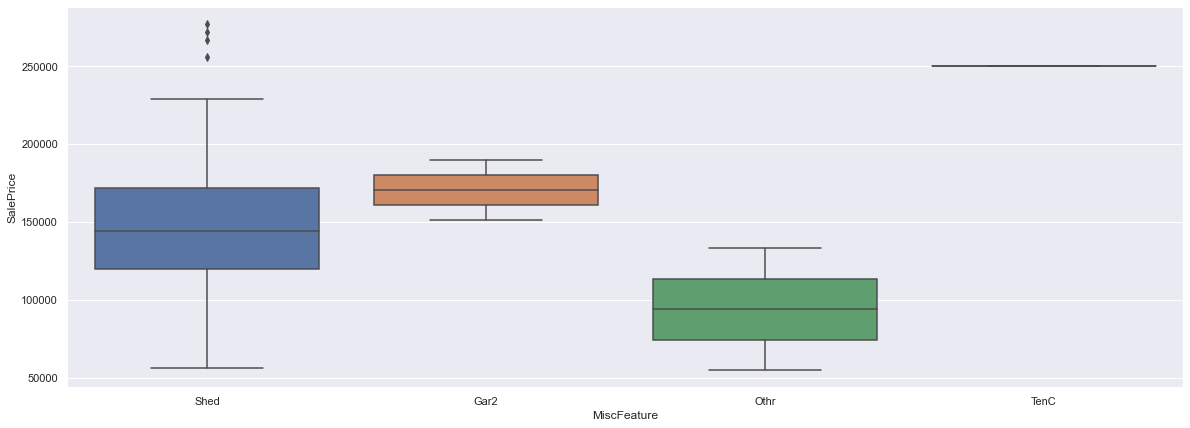

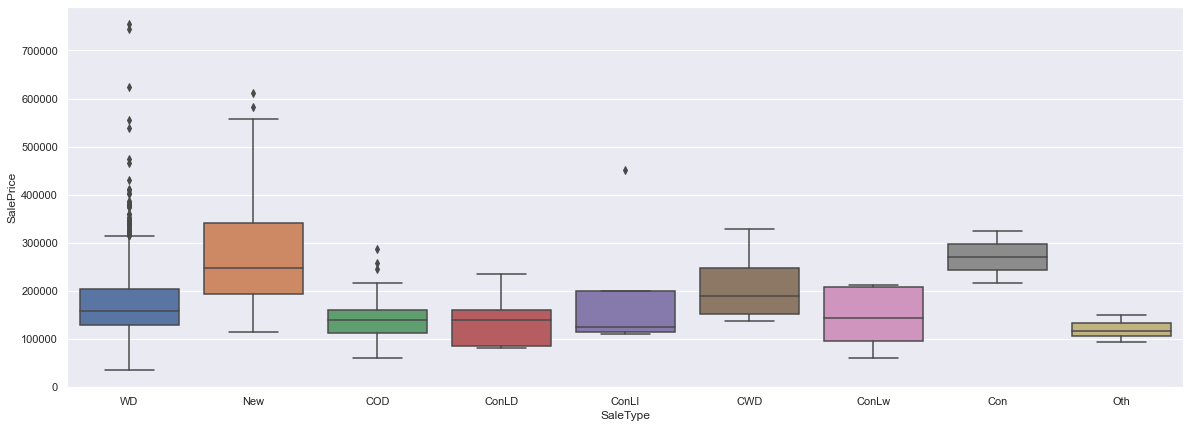

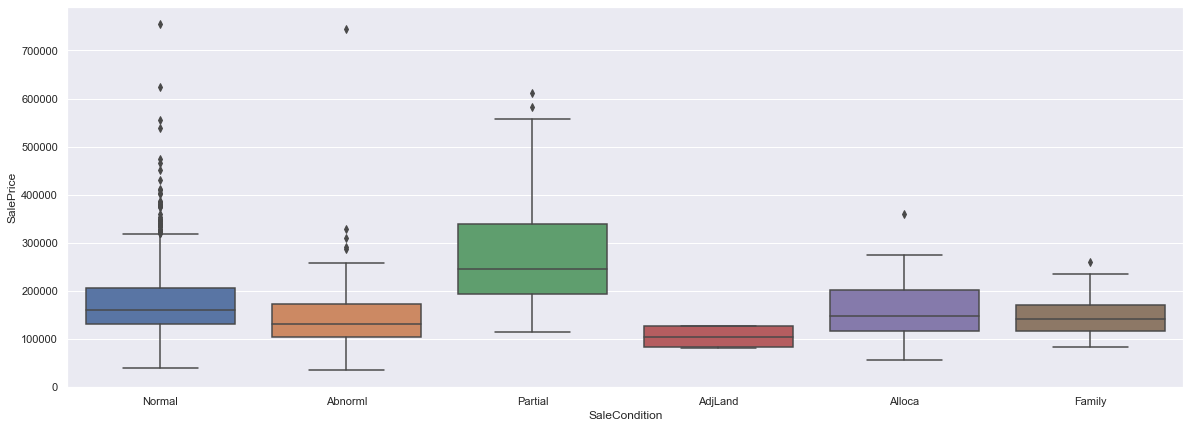

In [28]:
sns.set()
for col in obj_train:
    plt.subplots(figsize=(20,7))
    sns.boxplot(x=obj_train[col],y=train_data['SalePrice'])
    plt.show()
    train_labels 

### Ordinal Encoder:
#### [ To Navigation](#Navigation)

In [29]:
# temp = obj_X_train.isnull().fillna(0)
# obj_X_train[temp]
obj_train_imp=obj_train.fillna(0)

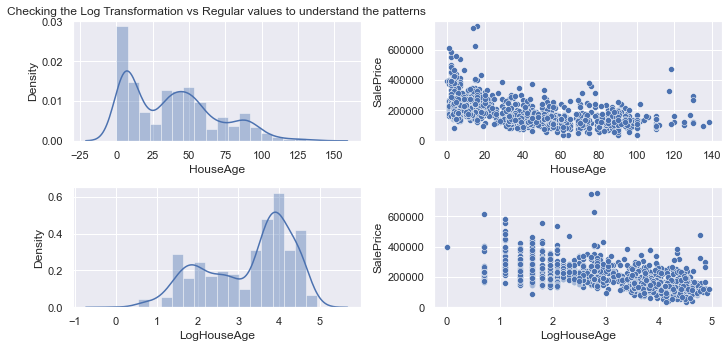

In [30]:
### Calculating Informative columns
# Since this dataset was collected in 2010, I am assuming we calculate based on that to find the age of the home

train_data['HouseAge'] = 2010 - train_data["YearBuilt"]

# Checking the distribution of 'HouseAge', 'YearsSinceRemod', 'GarageAge' and 'YearsSinceSold'

year_df = train_data['HouseAge']

plt.figure(figsize=(10, 5),tight_layout=True)


plt.subplot(2,2, 1)
plt.title("Checking the Log Transformation vs Regular values to understand the patterns")
sns.distplot(train_data['HouseAge'].dropna())
plt.subplot(2, 2, 2)
sns.scatterplot(x='HouseAge', y='SalePrice', data=train_data)

train_data['LogHouseAge'] = np.log1p(train_data['HouseAge'])
plt.subplot(2,2, 3)
sns.distplot(train_data['LogHouseAge'].dropna())
plt.subplot(2, 2, 4)
sns.scatterplot(x='LogHouseAge', y='SalePrice', data=train_data)
pass

In [31]:
train_data = train_data.drop(['HouseAge','LogHouseAge'], axis=1)

In [32]:
#my_dummy = list(obj_X_train_imp.columns)
pd.get_dummies(obj_train_imp, columns= list(obj_train_imp.columns), drop_first=True)

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  Street_Pave  \
0               0            0            1            0            1   
1               0            0            1            0            1   
2               0            0            1            0            1   
3               0            0            1            0            1   
4               0            0            1            0            1   
...           ...          ...          ...          ...          ...   
1455            0            0            1            0            1   
1456            0            0            1            0            1   
1457            0            0            1            0            1   
1458            0            0            1            0            1   
1459            0            0            1            0            1   

      Alley_Grvl  Alley_Pave  LotShape_IR2  LotShape_IR3  LotShape_Reg  ...  \
0              0           0             0             0             1  ...   
1              0           0             0             0             1  ...   
2              0           0             0             0             0  ...   
3              0           0             0             0             0  ...   
4              0           0             0             0             0  ...   
...          ...         ...           ...           ...           ...  ...   
1455           0           0             0             0             1  ...   
1456           0           0             0             0             1  ...   
1457           0           0             0             0             1  ...   
1458           0           0             0             0             1  ...   
1459           0           0             0             0             1  ...   

      SaleType_ConLI  SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0               0             0             0            1   
1                  0               0             0             0            1   
2                  0               0             0             0            1   
3                  0               0             0             0            1   
4                  0               0             0             0            1   
...              ...             ...           ...           ...          ...   
1455               0               0             0             0            1   
1456               0               0             0             0            1   
1457               0               0             0             0            1   
1458               0               0             0             0            1   
1459               0               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                    

### Merging the dataframes of Object and Integer

In [33]:
num_train_imp = num_train_imp.astype (int) 

In [34]:
my_col_list = train_features.columns

In [35]:
ml_train = pd.concat([obj_train_imp, num_train_imp], axis=1)
ml_train = ml_train[my_col_list]
ml_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL           65     8450   Pave     0      Reg   
1        2          20       RL           80     9600   Pave     0      Reg   
2        3          60       RL           68    11250   Pave     0      IR1   
3        4          70       RL           60     9550   Pave     0      IR1   
4        5          60       RL           84    14260   Pave     0      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL           62     7917   Pave     0      Reg   
1456  1457          20       RL           85    13175   Pave     0      Reg   
1457  1458          70       RL           66     9042   Pave     0      Reg   
1458  1459          20       RL           68     9717   Pave     0      Reg   
1459  1460          20       RL           75     9937   Pave     0      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0      0      0           0       0   
1            Lvl    AllPub  ...        0      0      0           0       0   
2            Lvl    AllPub  ...        0      0      0           0       0   
3            Lvl    AllPub  ...        0      0      0           0       0   
4            Lvl    AllPub  ...        0      0      0           0       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0      0      0           0       0   
1456         Lvl    AllPub  ...        0      0  MnPrv           0       0   
1457         Lvl    AllPub  ...        0      0  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0      0      0           0       0   
1459         Lvl    AllPub  ...        0      0      0           0       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [36]:
# Nominal Categories One-hot encoding

ml_train= pd.get_dummies(ml_train,columns=["MSSubClass"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["MSZoning"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Street"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Alley"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["LotShape"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["LandContour"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Utilities"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["LotConfig"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["LandSlope"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Neighborhood"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Condition1"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Condition2"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["BldgType"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["HouseStyle"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["RoofStyle"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["RoofMatl"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Exterior1st"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Exterior2nd"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["MasVnrType"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Foundation"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Heating"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["CentralAir"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["Electrical"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["GarageType"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["PavedDrive"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["MiscFeature"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["MoSold"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["SaleType"], drop_first=True)
ml_train= pd.get_dummies(ml_train,columns=["SaleCondition"], drop_first=True)

In [37]:
# Ordinal Categories to numbers using the following scale mappers

# Setting scale mapper for Ordinal Categories
scale_mapper_1 = {'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
scale_mapper_2 = {'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
scale_mapper_3 = {'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}
scale_mapper_4 = {'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}
scale_mapper_5 = {'NA':0, 'Unf':1, 'RFn':2, 'Fin':3}
scale_mapper_6 = {'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4}
scale_mapper_7 = {'NA':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}

# Converting Ordinal Categories to numbers by using the scale mappers above
ml_train['ExterQual'] = ml_train['ExterQual'].replace(scale_mapper_1)
ml_train['ExterCond'] = ml_train['ExterCond'].replace(scale_mapper_1)
ml_train['BsmtQual'] = ml_train['BsmtQual'].replace(scale_mapper_1)
ml_train['BsmtCond'] = ml_train['BsmtCond'].replace(scale_mapper_1)
ml_train['BsmtExposure'] = ml_train['BsmtExposure'].replace(scale_mapper_2)
ml_train['BsmtFinType1'] = ml_train['BsmtFinType1'].replace(scale_mapper_3)
ml_train['BsmtFinType2'] = ml_train['BsmtFinType2'].replace(scale_mapper_3)
ml_train['HeatingQC'] = ml_train['HeatingQC'].replace(scale_mapper_1)
ml_train['KitchenQual'] = ml_train['KitchenQual'].replace(scale_mapper_1)
ml_train['Functional'] = ml_train['Functional'].replace(scale_mapper_4)
ml_train['FireplaceQu'] = ml_train['FireplaceQu'].replace(scale_mapper_1)
ml_train['GarageFinish'] = ml_train['GarageFinish'].replace(scale_mapper_5)
ml_train['GarageQual'] = ml_train['GarageQual'].replace(scale_mapper_1)
ml_train['GarageCond'] = ml_train['GarageCond'].replace(scale_mapper_1)
ml_train['PoolQC'] = ml_train['PoolQC'].replace(scale_mapper_6)
ml_train['Fence'] = ml_train['Fence'].replace(scale_mapper_7)

In [38]:
ml_train

Id  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1           65     8450            7            5       2003   
1        2           80     9600            6            8       1976   
2        3           68    11250            7            5       2001   
3        4           60     9550            7            5       1915   
4        5           84    14260            8            5       2000   
...    ...          ...      ...          ...          ...        ...   
1455  1456           62     7917            6            5       1999   
1456  1457           85    13175            6            6       1978   
1457  1458           66     9042            7            9       1941   
1458  1459           68     9717            5            6       1950   
1459  1460           75     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  ExterQual  ExterCond  ...  SaleType_ConLI  \
0             2003         196          4          3  ...               0   
1             1976           0          3          3  ...               0   
2             2002         162          4          3  ...               0   
3             1970           0          3          3  ...               0   
4             2000         350          4          3  ...               0   
...            ...         ...        ...        ...  ...             ...   
1455          2000           0          3          3  ...               0   
1456          1988         119          3          3  ...               0   
1457          2006           0          5          4  ...               0   
1458          1996           0          3          3  ...               0   
1459          1965           0          4          3  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1455               0             0             0            1   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1455                     1                      0  
1456                     1                      0  
1457                     1                      0  
1458

In [39]:
ml_train=ml_train.set_index('Id')
ml_train

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1              65     8450            7            5       2003          2003   
2              80     9600            6            8       1976          1976   
3              68    11250            7            5       2001          2002   
4              60     9550            7            5       1915          1970   
5              84    14260            8            5       2000          2000   
...           ...      ...          ...          ...        ...           ...   
1456           62     7917            6            5       1999          2000   
1457           85    13175            6            6       1978          1988   
1458           66     9042            7            9       1941          2006   
1459           68     9717            5            6       1950          1996   
1460           75     9937            5            6       1965          1965   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLI  \
Id                                                ...                   
1            196          4          3         4  ...               0   
2              0          3          3         4  ...               0   
3            162          4          3         4  ...               0   
4              0          3          3         3  ...               0   
5            350          4          3         4  ...               0   
...          ...        ...        ...       ...  ...             ...   
1456           0          3          3         4  ...               0   
1457         119          3          3         4  ...               0   
1458           0          5          4         3  ...               0   
1459           0          3          3         3  ...               0   
1460           0          4          3         3  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                              
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
5                  0             0             0            1   
...              ...           ...           ...          ...   
1456               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   
1460               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
5                         0                     0                     0   
...                     ...                   ...                   ...   
1456                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   
1460                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
Id                                                 
1                        1                      0  
2                       

In [40]:
ml_train.iloc[0]['SalePrice']

208500

In [41]:
train_data[train_data['Id'] ==1]['SalePrice']

0    208500
Name: SalePrice, dtype: int64

#### Preliminary Regression Predictions on Train data set

In [42]:
price = ml_train['SalePrice']

In [43]:
features = ml_train.drop('SalePrice',axis=1)

In [44]:
X_train, X_dev, y_train, y_dev = train_test_split(features, price, test_size = 0.2, random_state = 5 )

In [45]:
len(X_train)

1168

In [46]:
len(y_train)

1168

In [47]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [48]:
temp_X = X_train.iloc[0:5]
temp_X

LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                              
1359           69     2117            6            5       2000          2000   
391            50     8405            5            8       1900          1950   
1335           24     2368            5            6       1970          1970   
1073           50     7585            5            3       1948          1950   
1444           69     8854            6            6       1916          1950   

      MasVnrArea  ExterQual  ExterCond  BsmtQual  ...  SaleType_ConLI  \
Id                                                ...                   
1359         216          4          3         4  ...               0   
391            0          3          3         3  ...               0   
1335         312          3          3         3  ...               0   
1073           0          3          3         2  ...               0   
1444           0          3          3         3  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
Id                                                              
1359               0             0             0            1   
391                0             0             0            1   
1335               0             0             0            1   
1073               0             0             0            1   
1444               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1359                      0                     0                     0   
391                       0                     0                     0   
1335                      0                     0                     0   
1073                      0                     0                     0   
1444                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
Id                                                 
1359                     1                      0  
391                      1                      0  
1335                     1                      0  
1073                     1                      0  
1444                     1                      0  

[5 rows x 231 columns]

In [49]:
temp_y = y_train.iloc[0:5]
temp_y

Id
1359    177500
391     119000
1335    125000
1073     91500
1444    121000
Name: SalePrice, dtype: int32

In [50]:
# let's try the full preprocessing pipeline on a few training instances
print("Labels:", list(temp_y))
print("Predictions:", np.round(lin_reg.predict(temp_X),0))


Labels: [177500, 119000, 125000, 91500, 121000]
Predictions: [157304. 121970. 129626.  93084. 107414.]


#### Preliminary Predictions:
The predictions are not accurate. The first one is off by ~20K etc. <br>
<b><u>Labels:</u></b> [177500, 119000, 125000, 91500, 121000]<br>
<b><u>Predictions:</u></b>: [157304. 121970. 129626.  93084. 107414.] <br>

Lets measure the Regression RMSE on the training set

#### Training Set RMSE:

In [51]:
#from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
home_median_price = '{:,.2f}'.format(round(ml_train['SalePrice'].median(),0))
my_value = '{:,.2f}'.format(round(lin_rmse,0))
print(f"The median home sales is : {home_median_price}")
print(f"The RMSE error or predictions of the Sale Price is off by: {my_value}")

The median home sales is : 163,000.00
The RMSE error or predictions of the Sale Price is off by: 21,828.00


# Model 2: Decision Tree


In [52]:
from sklearn.tree import DecisionTreeRegressor
# lin_reg.fit(ml_X_train, ml_y_train)
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [53]:
housing_predictions = tree_reg.predict(X_dev)
tree_mse = mean_squared_error(y_dev, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
home_median_price = '{:,.2f}'.format(round(ml_train['SalePrice'].median(),0))
my_value = '{:,.2f}'.format(round(tree_rmse,0))
print(f"The median home sales is : {home_median_price}")
print(f"The RMSE error or predictions of the Sale Price is off by: {my_value}")

The median home sales is : 163,000.00
The RMSE error or predictions of the Sale Price is off by: 42,177.00


##### The model spits out rmse ~42K . it is a scenario of underfitting. <font color = 'red'>Decision Tree is performing worse than Linear Regression,  </font>

# Model 3: Random Forest

In [54]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)
housing_predictions = forest_reg.predict(X_dev)
forest_mse = mean_squared_error(y_dev, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

28711.232516913125

##### The model spits out rmse ~28K . <font color = 'red'>Random Forest performed so far better than all the models so far  </font>

# Model 4: SVM

In [55]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(X_train, y_train)
housing_predictions = svm_reg.predict(X_dev)
svm_mse = mean_squared_error(y_dev, housing_predictions)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

36534.60493957353

##### The model spits out rmse ~37K . <font color = 'red'>Random Forest performed so far better than all the models so far  </font>

### Model Fine Tuning

#### Cross Validation score:
##### Standard Deviation using cv for:
1. Decision Tree
2. Linear Regression

In [56]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, X_train, y_train,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
# note: negative because cv features expect a utilty function rather than a cost function. so the scoring function
# is actually the opposite of the MSE(i.e., a negative value)

In [58]:
display_scores(tree_rmse_scores)

Scores: [44531.46058044 33780.94697238 67954.06257725 43308.65111698
 45672.65582081 38747.53841964 34143.75429915 45528.69840077
 39130.07885202 39022.04845374]
Mean: 43181.98954931812
Standard deviation: 9223.122699155889


##### Using Cross validation, it is surprising that the model is underperforming.
<font color = 'red'>Once again we proved that Decision Tree in this scenario is not suitable.  </font><br>The standard deviation is -9223 to +9223.

In [59]:
lin_scores = cross_val_score(lin_reg, X_train, y_train,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [43704.70305724 26945.83377091 65338.62944619 45310.94582953
 72329.4041706  32216.61999739 26682.89756573 87951.38504676
 31668.04001586 29769.41257153]
Mean: 46191.78714717231
Standard deviation: 20560.99337941229


##### Using Cross validation, it is another surprise to observe the  linear regression scores got worse.
</font><br>The standard deviation is -20,560 to +20,560.

In [60]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [40626.47304765 25138.94063723 42510.96451593 24975.72885152
 29818.0852749  26749.31149833 23353.1323817  43954.85532973
 32299.08038779 24849.4528236 ]
Mean: 31427.602474839638
Standard deviation: 7610.9899812606245


##### Random Forest performed much better and looks promising. 
The score from the trianing set is 28711<br>
The score from the validation set is (the mean) is 31427. the model is still overfitting with an SD of 7610.

## HyperParameters
    a. Using Grid Search

In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (3×4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [63]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30, random_state=42)

In [64]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

44503.25802883476 {'max_features': 2, 'n_estimators': 3}
37654.54167612656 {'max_features': 2, 'n_estimators': 10}
36540.14858846072 {'max_features': 2, 'n_estimators': 30}
45192.53141326442 {'max_features': 4, 'n_estimators': 3}
37719.73787363824 {'max_features': 4, 'n_estimators': 10}
35714.711659347806 {'max_features': 4, 'n_estimators': 30}
42854.121208710596 {'max_features': 6, 'n_estimators': 3}
34791.29480628207 {'max_features': 6, 'n_estimators': 10}
34167.11231022401 {'max_features': 6, 'n_estimators': 30}
43014.69128972292 {'max_features': 8, 'n_estimators': 3}
36632.66263598297 {'max_features': 8, 'n_estimators': 10}
35390.6382116871 {'max_features': 8, 'n_estimators': 30}
42894.35159516809 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
36641.97996373277 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
42326.681139329776 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
37132.56907826402 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

#### The best mean score so far with grid search is: 49682 {'max_features': 8, 'n_estimators': 30}

In [65]:
pd.DataFrame(grid_search.cv_results_).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.010570      0.002325         0.002599        0.000495   
1       0.021936      0.003028         0.003790        0.000746   
2       0.053527      0.001989         0.005384        0.000488   
3       0.010734      0.001426         0.003113        0.000833   
4       0.022150      0.001708         0.004388        0.001831   

  param_max_features param_n_estimators param_bootstrap  \
0                  2                  3             NaN   
1                  2                 10             NaN   
2                  2                 30             NaN   
3                  4                  3             NaN   
4                  4                 10             NaN   

                                    params  split0_test_score  \
0   {'max_features': 2, 'n_estimators': 3}      -1.876420e+09   
1  {'max_features': 2, 'n_estimators': 10}      -1.154970e+09   
2  {'max_features': 2, 'n_estimators': 30}      -9.040576e+08   
3   {'max_features': 4, 'n_estimators': 3}      -1.548114e+09   
4  {'max_features': 4, 'n_estimators': 10}      -1.115235e+09   

   split1_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0      -1.855183e+09  ...    -1.980540e+09    9.914693e+07               17   
1      -1.209476e+09  ...    -1.417865e+09    2.885055e+08               10   
2      -1.204637e+09  ...    -1.335182e+09    3.369130e+08                6   
3      -2.209676e+09  ...    -2.042365e+09    4.650728e+08               18   
4      -1.413029e+09  ...    -1.422779e+09    2.408419e+08               11   

   split0_train_score  split1_train_score  split2_train_score  \
0       -4.975459e+08       -4.791753e+08       -4.936286e+08   
1       -2.420788e+08       -2.523448e+08       -2.755096e+08   
2       -1.923603e+08       -1.863101e+08       -2.179604e+08   
3       -5.246273e+08       -4.758568e+08       -4.464515e+08   
4       -2.315950e+08       -2.460561e+08       -2.296854e+08   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0       -6.165797e+08       -4.627066e+08     -5.099272e+08     5.471590e+07  
1       -3.158232e+08       -2.556461e+08     -2.682805e+08     2.612536e+07  
2       -2.129543e+08       -2.214332e+08     -2.062037e+08     1.416420e+07  
3       -5.256000e+08       -5.105421e+08     -4.966156e+08     3.087414e+07  
4       -2.425357e+08       -2.748093e+08     -2.449363e+08     1.618635e+07  

[5 rows x 23 columns]

In [66]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A82EA6850>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000023A82DE3F40>},
                   random_state=42, scoring='neg_mean_squared_error')

In [67]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

33490.67477315823 {'max_features': 7, 'n_estimators': 180}
35808.289233089825 {'max_features': 5, 'n_estimators': 15}
35401.5212729434 {'max_features': 3, 'n_estimators': 72}
34488.655089554464 {'max_features': 5, 'n_estimators': 21}
33789.5998274836 {'max_features': 7, 'n_estimators': 122}
35307.95087435198 {'max_features': 3, 'n_estimators': 75}
35331.02708059237 {'max_features': 3, 'n_estimators': 88}
34181.6678121618 {'max_features': 5, 'n_estimators': 100}
35414.50774599536 {'max_features': 3, 'n_estimators': 150}
46916.13636815483 {'max_features': 5, 'n_estimators': 2}


In [68]:
y_train_log = np.log1p(y_train)
y_dev_log = np.log1p(y_dev)
y_train_log.head()

Id
1359    12.086732
391     11.686887
1335    11.736077
1073    11.424105
1444    11.703554
Name: SalePrice, dtype: float64

## 5 Results & Error Analysis

Outline the main findings of your research
Potential Issues and Ideas of Resolution

**Question:** Why linear regression didn't perform though our initial thought was it is going to outperform ?  
**Proposal:** Take log on the SalePrice (dependent variable)

From above performance score which we include all features, it shows Random Forest performed better than others including the Linear Regression. we have included all the features to get better score. Below in the Apendix we have calcualted and plotted
the R^2 on Dev set for linear regression, which seems to subject to overfitting. Probably it signals our assumptions of classical linear regression was not satisfied which impact the linear regression's prediction accuracy.  Therefore, we carry out below analysis to check on the fitted value versus residuals plot.

**Important Assumption for Linear Regression: Zero Conditional mean of the error**
Log transformation was able to produce the zero conditional mean for the fitted vs residuals. Log on the dependent variable helped to meet the assumption criteria for LR. Hopefully this should give a better accuracy with less variance(or constant) or homoscedasticity.

Text(0.5, 0, 'SalePrice fitted value')

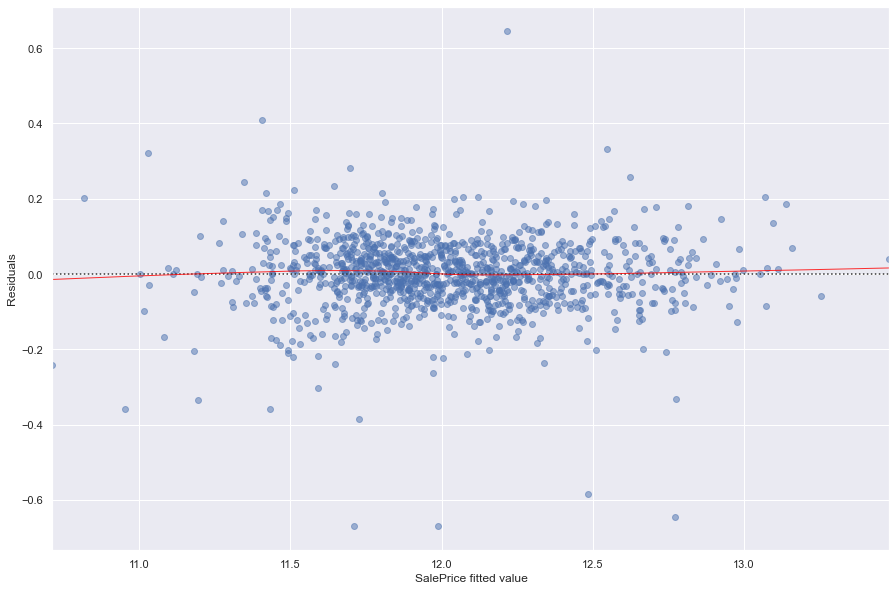

In [69]:
linear_regression_log = LinearRegression()
linear_regression_log.fit(X_train, y_train_log)
model_fitted_y_log =  linear_regression_log.predict(X_train)

plt.subplots(figsize=(15,10))
sns.set()
combine_train_log = pd.concat([X_train, y_train_log], axis=1) # for easier plot handling
sns.residplot(model_fitted_y_log, 'SalePrice', data= combine_train_log, 
                          lowess=True, 
                          scatter_kws={'alpha': 0.5}, 
                          line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.ylabel("Residuals")
plt.xlabel("SalePrice fitted value")

In [70]:
def linear_regression(X_train, y_train, X_dev, y_dev):
    linear_regression = LinearRegression()
    linear_regression = linear_regression.fit(X_train, y_train)
    linear_reg_pred = linear_regression.predict(X_train)
    print("Linear Regression Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:", r2_score(y_train, linear_reg_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, linear_reg_pred)))
    
    print("\nDev set:")
    linear_reg_pred = linear_regression.predict(X_dev)
    print("R^2 with r2_score function:", r2_score(y_dev, linear_reg_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, linear_reg_pred)))

linear_regression(X_train, y_train_log, X_dev, y_dev_log)

Linear Regression Algorithm:
Training set:
R^2 with r2_score function: 0.9429341110099005
RMSE: 0.09471861274887876

Dev set:
R^2 with r2_score function: 0.9041782249878556
RMSE: 0.12699574418145915


## Improved Score:
The score accuracy for the dev set improved after the log transformation of both the train and dev set for the dependent variable.

In [71]:
from sklearn.tree import DecisionTreeRegressor

def decision_tree(X_train, y_train, X_dev, y_dev):
    dt_reg_num = DecisionTreeRegressor(random_state=5)
    dt_fit_reg_num = dt_reg_num.fit(X_train, y_train)
    pred_reg_num = dt_fit_reg_num.predict(X_train)
    print("Decision Tree Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:", r2_score(y_train, pred_reg_num))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, pred_reg_num)))
    
    print("\nDev set:")
    pred_reg_num = dt_fit_reg_num.predict(X_dev)
    print("R^2 with r2_score function:", r2_score(y_dev, pred_reg_num))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, pred_reg_num)))
decision_tree(X_train, y_train_log, X_dev, y_dev_log)

Decision Tree Algorithm:
Training set:
R^2 with r2_score function: 1.0
RMSE: 0.0

Dev set:
R^2 with r2_score function: 0.7243711441485432
RMSE: 0.21538695808053945


### The Random Forest Performed better when log transformed as opposed to Linear Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X_train, y_train, X_dev, y_dev):
    Rforest_reg = RandomForestRegressor(random_state=5)
    Rforest_reg.fit(X_train, y_train)
    Rforest_pred = Rforest_reg.predict(X_train)
    print("Random Forest Algorithm:")
    print("Training set:")
    print("R^2 with r2_score function:", r2_score(y_train, Rforest_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_train, Rforest_pred)))

    print("\nDev set:")
    Rforest_pred = Rforest_reg.predict(X_dev)
    print("R^2 with r2_score function:", r2_score(y_dev, Rforest_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_dev, Rforest_pred)))
random_forest(X_train, y_train_log, X_dev, y_dev_log)

Random Forest Algorithm:
Training set:
R^2 with r2_score function: 0.9818087106032337
RMSE: 0.053478445719293256

Dev set:
R^2 with r2_score function: 0.8811289190221911
RMSE: 0.14144746471116693


#### Finally based on above methods and the log transformed method we have seen Random Forest outperformed Linear Regression and other models. <br>

### The model accruracy is <font color = red >94%</font>

## 7 Next Step

1. Looking at the models, we need to try other models.<br>
    a) Support Vector Machines with varying number of kernals. <br>
    b) May be try with Neural Network. <br>
    c) Gradient Boost etc. <br>

# Apendix:

### ProfileReport

In [73]:
# we chose not to use ProfileReport as it is time consuming and memory intensive.

# profile = ProfileReport(preprocessed_train, title='Group 4 EDA', explorative=True)
# profile.to_widgets()
# #profile.to_file("w207_housing_dataset_EDA_VasudevKillada.html")

### Autoviz

In [74]:
# we chose not to use ProfileReport as it is time consuming and memory intensive.
# from autoviz.AutoViz_Class import AutoViz_Class
# #plot_cols = ['SalePrice','LotArea',]
# plot_cols = ['LotFrontage','LotArea','HouseStyle','LotShape','SalePrice']
# AV = AutoViz_Class()
# scatterplotmatrix(train_data[plot_cols].values, figsize=(12,10), names=plot_cols,alpha=0.5)
# plt.tight_layout()
# plt.show()

### SalePrice Distribution Analysis

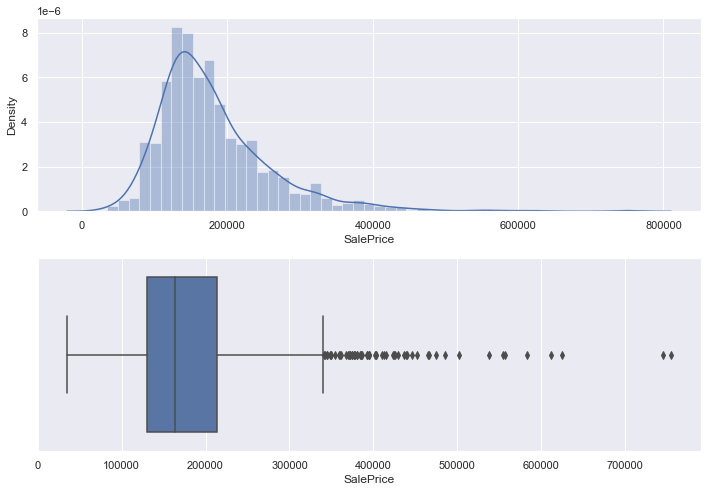

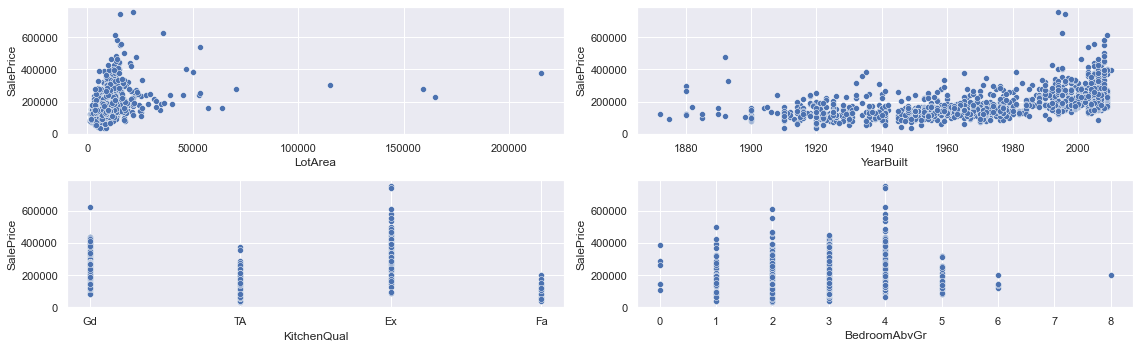

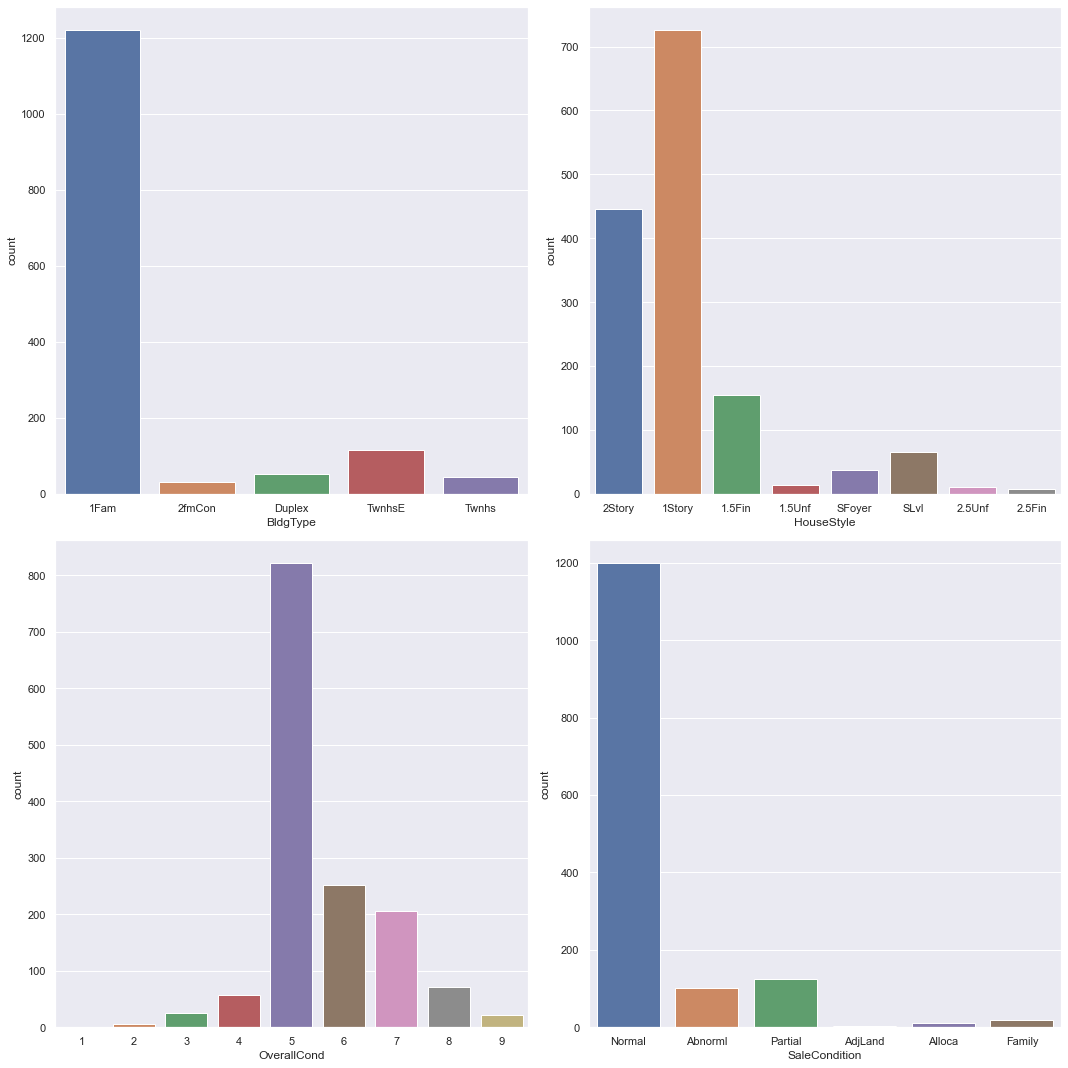

In [75]:
#visualizing house prices
# we are plotting both distribution plot and box plot to identify the distribution curve and also to find the outliers.
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(train_data['SalePrice'])
fig.add_subplot(2,1,2)
sns.boxplot(train_data['SalePrice'])
plt.tight_layout()

#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)


sns.scatterplot(train_data['LotArea'], train_data['SalePrice'])
fig.add_subplot(2,2,2)
sns.scatterplot(train_data['YearBuilt'],train_data['SalePrice'])
fig.add_subplot(2,2,3)
sns.scatterplot(train_data['KitchenQual'],train_data['SalePrice'])
fig.add_subplot(2,2,4)
sns.scatterplot(train_data['BedroomAbvGr'],train_data['SalePrice'])
fig.tight_layout()


#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,15))
fig.add_subplot(2,2,1)
sns.countplot(train_data['BldgType'])
fig.add_subplot(2,2,2)
sns.countplot(train_data['HouseStyle'])
fig.add_subplot(2,2,3)
sns.countplot(train_data['OverallCond'])
fig.add_subplot(2,2,4)
sns.countplot(train_data['SaleCondition'])
plt.tight_layout()

pass

In [76]:
from sklearn.feature_selection import SelectKBest # for feature selection
from sklearn.feature_selection import chi2 # for feature selection
from sklearn.ensemble import ExtraTreesClassifier # for feature importance
bestfeatures = SelectKBest(score_func=chi2, k=20)
fit = bestfeatures.fit(X_train,y_train)

In [77]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train.columns)

In [78]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1,sort=True)
featureScores.columns = ['features','Score']  #naming the dataframe columns
#df.sort_values(by=['col1'], ascending = False)
featureScores = featureScores.sort_values('Score',ascending = False)
#print(featureScores.nlargest(40,'Score'))  #print 40 best features

In [79]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
featureScores.head(40)
# pd.reset_option('display.float_format')
# featureScores.head(40)

features          Score
1                  LotArea 10647778.21117
48                 MiscVal   892916.84771
20                2ndFlrSF   390598.75326
15              BsmtFinSF2   332421.43364
13              BsmtFinSF1   327821.48451
45                PoolArea   238740.85358
16               BsmtUnfSF   234718.25149
6               MasVnrArea   223388.91198
21            LowQualFinSF   197199.28676
22               GrLivArea   162459.08103
43               3SsnPorch   160279.34511
17             TotalBsmtSF   142534.44897
44             ScreenPorch   120702.98728
40              WoodDeckSF   109537.22719
19                1stFlrSF   103066.22390
42           EnclosedPorch    88289.62877
37              GarageArea    80778.00134
41             OpenPorchSF    59594.46942
0              LotFrontage     4512.90299
46                  PoolQC     1677.60000
33             FireplaceQu     1369.51098
47                   Fence     1331.35169
152    Exterior1st_ImStucc     1167.00000
121        Condition2_RRAn     1167.00000
219           SaleType_Con     1166.00000
227   SaleCondition_Alloca     1072.48148
107   Neighborhood_Veenker     1007.59259
223           SaleType_New      920.78554
72            LotShape_IR3      908.55556
182       Foundation_Stone      905.44444
230  SaleCondition_Partial      901.94653
99    Neighborhood_NridgHt      880.30714
119        Condition2_PosN      874.00000
192       Electrical_FuseP      874.00000
98    Neighborhood_NoRidge      859.51717
135      RoofStyle_Gambrel      827.34568
12            BsmtFinType1      812.54637
164    Exterior2nd_CmentBd      797.57019
150    Exterior1st_CemntBd      790.52041
186           Heating_Grav      776.66667

In [80]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(dataset, threshold):
    col_corr_list = []
    col_corr_set = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr_list.append(colname) # getting just the columns 
                col_corr_set.add((corr_matrix.columns[i], corr_matrix.columns[j])) # getting ordered pair of correlated.
    return (corr_matrix,col_corr_list,col_corr_set)

In [81]:
c = ml_train.corr()
# Rank the correlation by features
c['SalePrice'].sort_values(ascending=False) 

SalePrice            1.00000
OverallQual          0.79098
GrLivArea            0.70862
ExterQual            0.68264
KitchenQual          0.65960
                      ...   
LotShape_Reg        -0.26767
MSZoning_RM         -0.28807
Foundation_CBlock   -0.34326
GarageType_Detchd   -0.35414
MasVnrType_None     -0.37447
Name: SalePrice, Length: 232, dtype: float64

In [82]:
corr_matrix,col_corr_list, corr_set  = correlation(train_data, 0.7)
print(f"The total number of columns that are correlated are :{len(set(col_corr_list))}")
print(f"\nThe columns that are correlated are:")
print(5*"------")
for i in corr_set:
    print(i)

The total number of columns that are correlated are :5

The columns that are correlated are:
------------------------------
('GarageYrBlt', 'YearBuilt')
('GarageArea', 'GarageCars')
('SalePrice', 'GrLivArea')
('TotRmsAbvGrd', 'GrLivArea')
('1stFlrSF', 'TotalBsmtSF')
('SalePrice', 'OverallQual')


In [83]:
count = 0

def index_strings(arr):
    global count
    count = 0
    str_dict = {}
    def get_index(s):
        global count
        if s not in str_dict:
            str_dict[s] = count
            count += 1
        return str_dict[s]
    
    return list(map(get_index, arr))

In [ ]:
num_train = round(len(train_data) * .8)
dev_data = train_data[num_train:]
train_data = train_data[:num_train]
print(train_data.shape)
dev_data.head()
# train_features = train_data.loc[:, train_data.columns != 'SalePrice']
# train_labels = train_data['SalePrice']
# dev_features = dev_data.loc[:, dev_data.columns != 'SalePrice']
# dev_labels = dev_data['SalePrice']
# test_features = orginal_test_data.loc[:, orginal_test_data.columns != 'SalePrice']

In [85]:
num_train = round(len(train_data) * .8)

train1_data = train_data.copy()

dev1_data = train1_data[num_train:]
train1_data  = train1_data[:num_train]
dtype_o = list(train1_data.dtypes)[2]
dtype_o_columns = [index for index in range(len(list(train1_data.dtypes))) if list(train1_data.dtypes)[index] == dtype_o]


# converting the object type to the int type 
for column_index in dtype_o_columns:
    train1_data.iloc[:, column_index] = index_strings(list(train1_data.iloc[:, column_index]))
train1_data.fillna(0,inplace=True)

dtype_o = list(dev1_data.dtypes)[2]
dtype_o_columns = [index for index in range(len(list(dev1_data.dtypes))) if list(dev1_data.dtypes)[index] == dtype_o]


# converting the object type to the int type 
for column_index in dtype_o_columns:
    dev1_data.iloc[:, column_index] = index_strings(list(dev1_data.iloc[:, column_index]))
dev1_data.fillna(0,inplace=True)


In [86]:
train_features = train1_data.loc[:, train_data.columns != 'SalePrice']
train_labels = train1_data['SalePrice']
dev_features = dev1_data.loc[:, dev1_data.columns != 'SalePrice']
dev_labels = dev1_data['SalePrice']
test_features = orginal_test_data.loc[:, orginal_test_data.columns != 'SalePrice']

In [87]:
train_features = train_features.drop("Id", axis=1) # dropping the id column from the  train.
dev_features = dev_features.drop("Id", axis=1) # dropping the id column from the  dev.

### Potentail features that could be dropped?

In [88]:
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(np.bool))
corr_matrix = train_data.corr().abs()
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.70)]
print(" Potential Featues that can be dropped:\n")
to_drop

 Potential Featues that can be dropped:



['1stFlrSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'SalePrice']

In [89]:
new_train_features = train_features[train_features.columns[~train_features.columns.isin(to_drop)]].copy()
new_dev_features = dev_features [dev_features .columns[~dev_features .columns.isin(to_drop)]].copy()
new_test_features = test_features [test_features .columns[~test_features .columns.isin(to_drop)]].copy()

### Feature selection using Chi sqaure

In [90]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(new_train_features, train_labels)
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = new_train_features.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((new_train_features.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
selected_feat

total features: 75
selected features: 75


Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', '

In [91]:
bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(new_train_features,train_labels)
dfcols = pd.DataFrame(new_train_features.columns)
dfscores = pd.DataFrame(fit.scores_)
feat_selection = pd.concat([dfcols,dfscores], axis=1)
feat_selection.columns = ['feature','score']
print(feat_selection.nlargest(30,'score'))  #print 30 best features

          feature          score
3         LotArea 10326109.02246
70        MiscVal  6596678.99159
42       2ndFlrSF   405815.88181
33     BsmtFinSF1   334607.89594
35     BsmtFinSF2   321212.16614
36      BsmtUnfSF   244447.65412
25     MasVnrArea   242276.32363
43   LowQualFinSF   215380.94902
64      3SsnPorch   169305.54062
44      GrLivArea   159162.84825
66       PoolArea   149387.95034
37    TotalBsmtSF   144368.87166
65    ScreenPorch   113033.10056
61     WoodDeckSF   101594.64764
63  EnclosedPorch    92791.15333
62    OpenPorchSF    64099.26090
0      MSSubClass    17603.70837
2     LotFrontage    12500.71466
13     Condition2     2515.23469
11   Neighborhood     2160.30087
21       RoofMatl     1913.28486
34   BsmtFinType2     1907.57292
12     Condition1     1891.26172
58     GarageQual     1751.44039
23    Exterior2nd     1749.47481
22    Exterior1st     1672.25730
73       SaleType     1663.52024
52     Functional     1567.91823
74  SaleCondition     1550.96034
14       B

### Feature Importance

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(new_train_features,train_labels)

ExtraTreesClassifier()

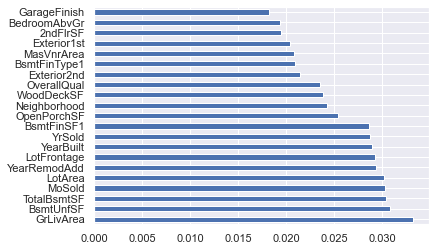

In [93]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=new_train_features.columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.show()

### Correlation matrix and heat map 

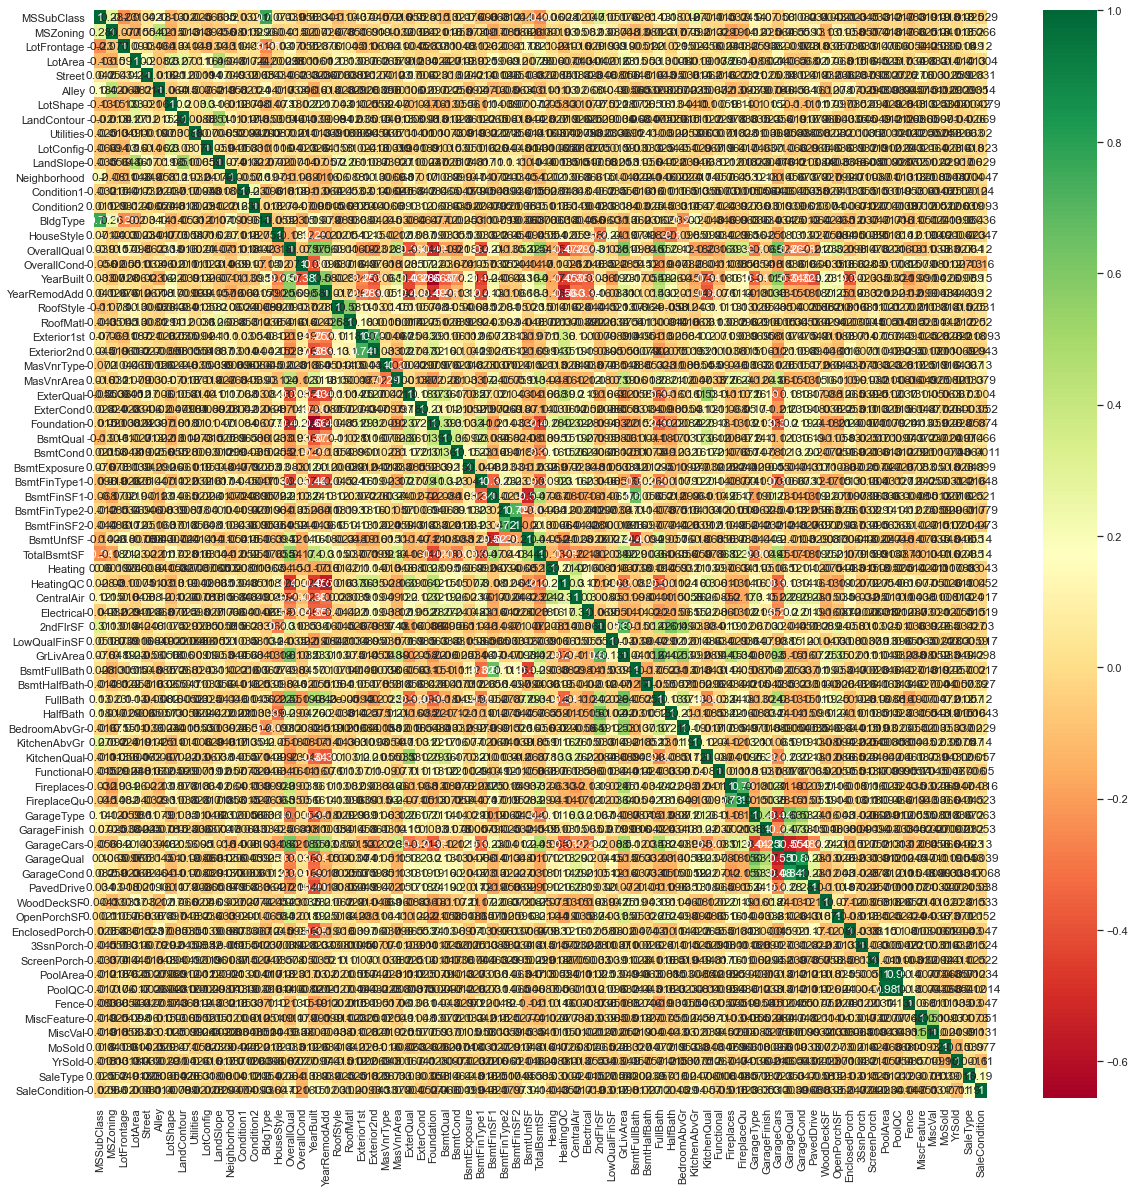

In [94]:
#get correlations of each features in dataset
corrmat = new_train_features.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(new_train_features[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Correlation run to drop featurs to avoid any computation issues and easier visualization

In [ ]:
### Correlation run to drop featurs to avoid any computation issues and easier visualization

In [95]:
new_train_features['SalePrice'] = train_data['SalePrice']
correlation_w_SalePrice = new_train_features.corr()
correlation_w_SalePrice.index[abs(correlation_w_SalePrice['SalePrice']) > 0.5] 

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', 'GrLivArea',
       'FullBath', 'GarageCars', 'SalePrice'],
      dtype='object')

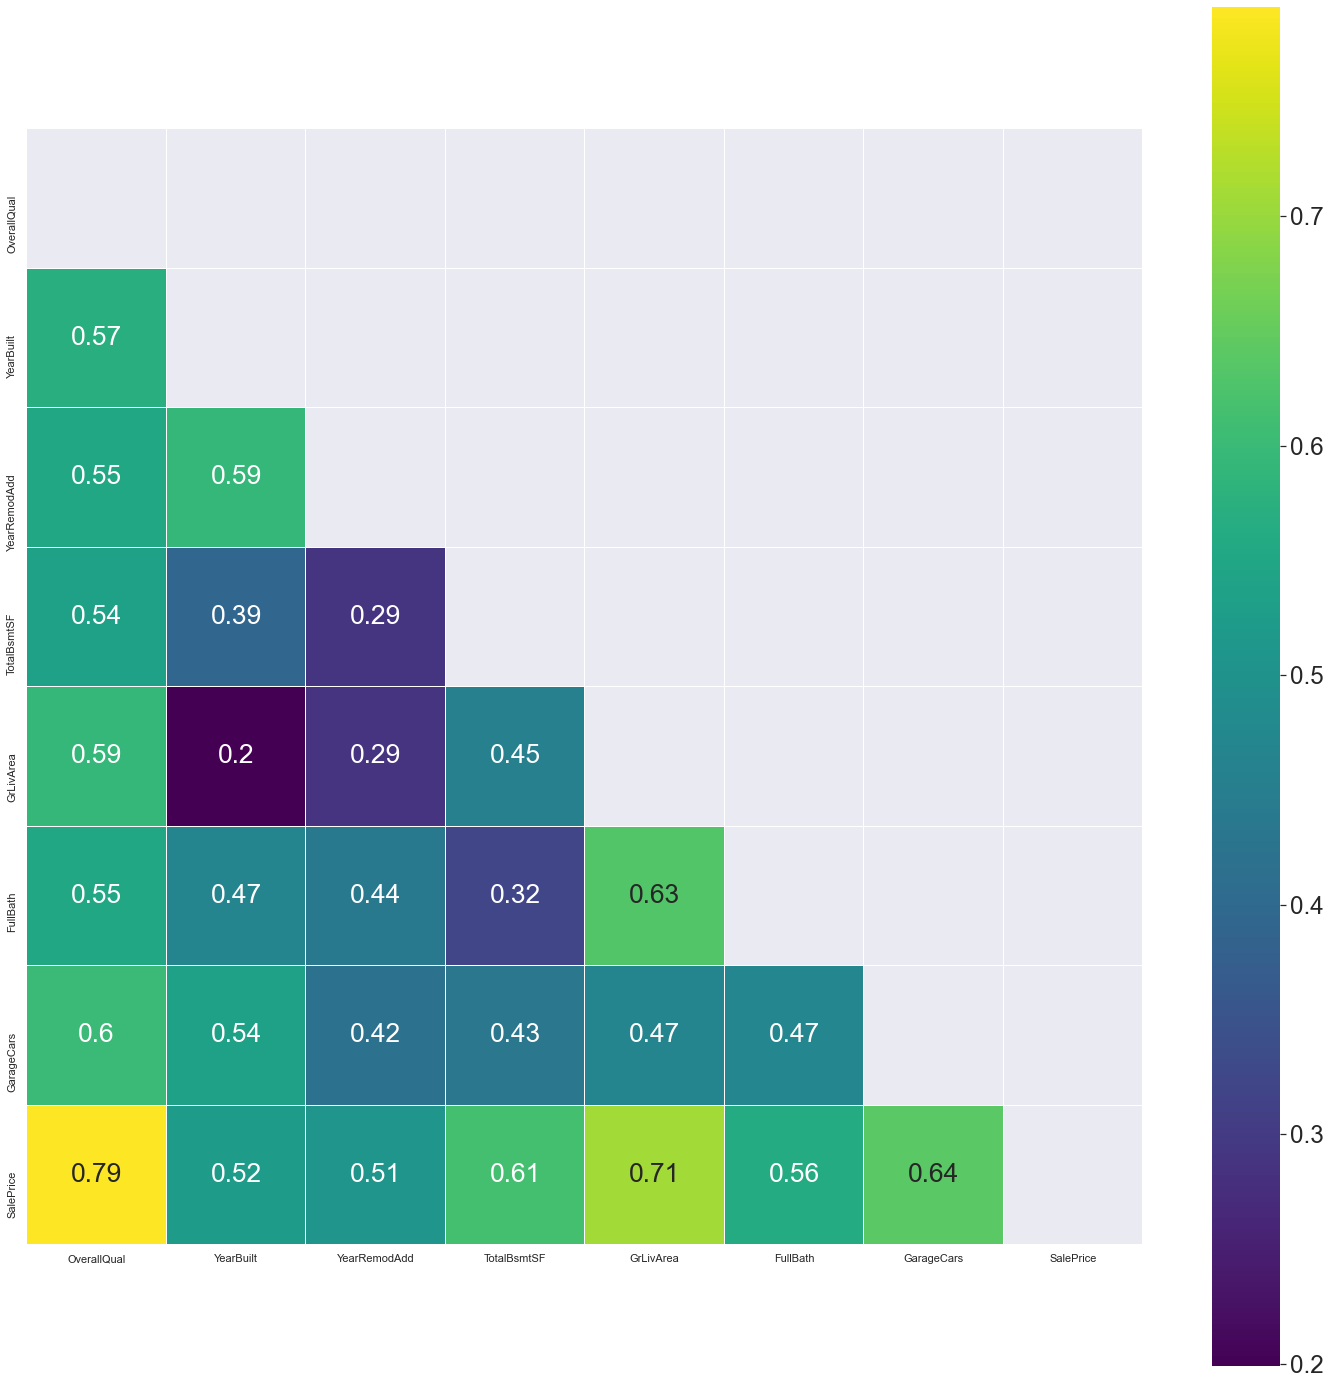

In [96]:
# Only Keep feature with correlation with SalePrice that higher than 0.5 in absolute value
top_corr_feature = correlation_w_SalePrice.index[abs(correlation_w_SalePrice['SalePrice']) > 0.5] 

# pass the top corr feature columns to train data and run correlation and mask upper triangle which are mirror to lower
plt.subplots(figsize=(25,25))
sns.set(font_scale=2.2)
top_cor1 = train_data[top_corr_feature].corr()
mask = np.zeros_like(top_cor1) 
mask[np.triu_indices_from(mask)] = True # Optional mask to remove the repetitive value
sns.heatmap(top_cor1, square=True, annot=True,  mask = mask, cmap = 'viridis',linecolor ='white', linewidths=0.01)
pass

In [ ]:
top_cor1.columns

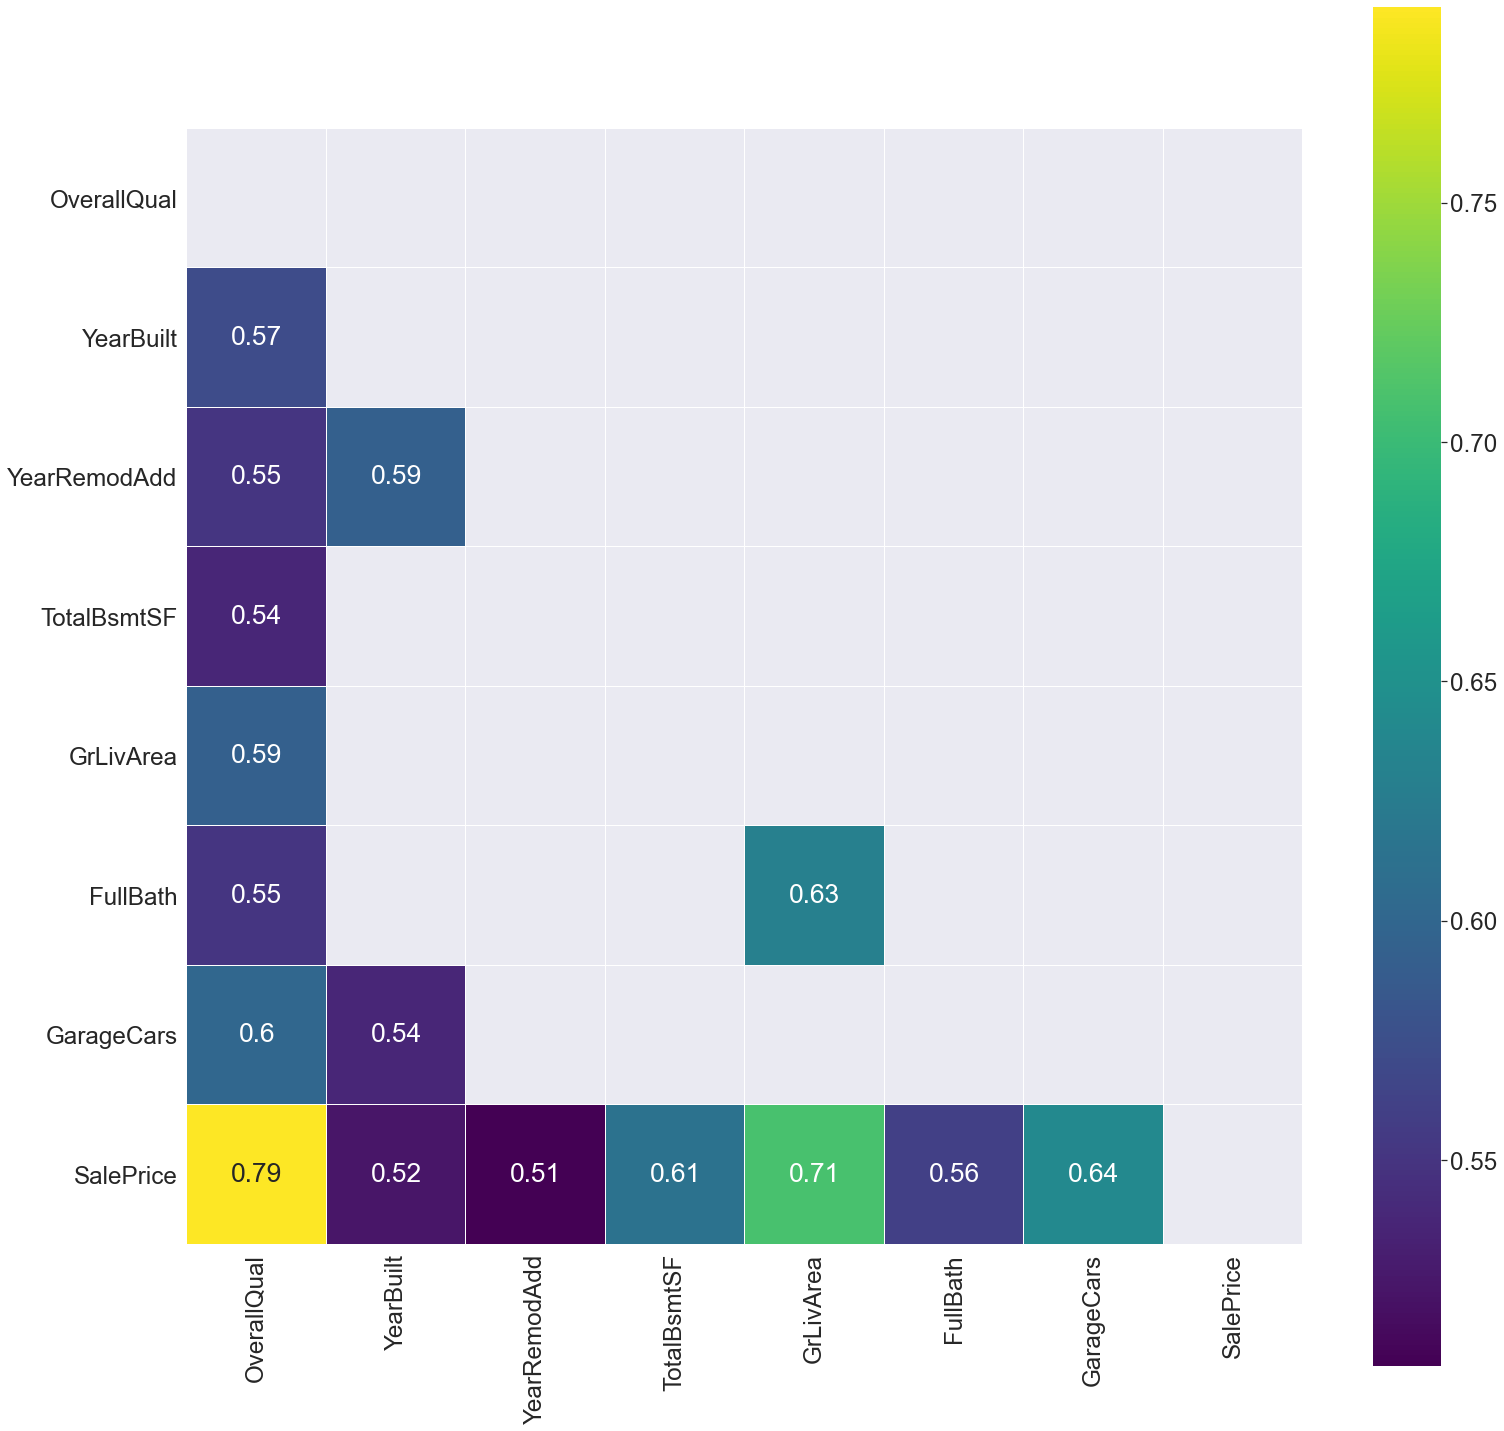

In [97]:
# Another view that further hide any correlation that lower than 0.5 in absolute value
#top_corr_feature = correlation_w_SalePrice.index[abs(correlation_w_SalePrice['SalePrice']) > 0.5] 

plt.subplots(figsize=(25,25))
sns.set(font_scale=2.2)
top_cor2 = train_data[top_corr_feature].corr()
mask = np.zeros_like(top_cor2) 
mask[np.where(abs(top_cor2) < 0.5)] = True # Optional mask to hide low correlation
mask[np.triu_indices_from(mask)] = True # Optional mask to hide the repetitive value

sns.heatmap(top_cor2, square=True, annot=True,  mask = mask, cmap = 'viridis',linecolor ='white', linewidths=0.01)
pass

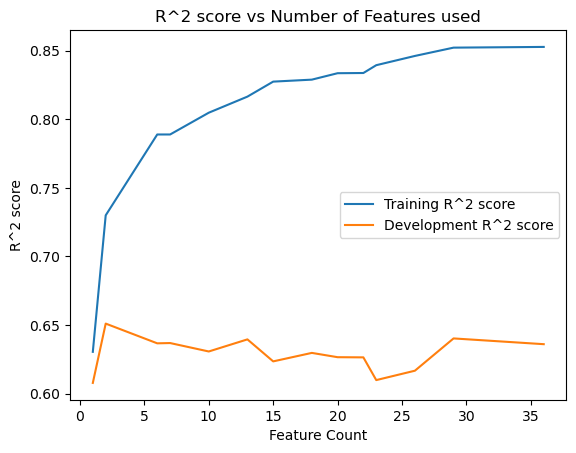

In [98]:
# To experiment: to plot R^2 score of Linear Regression 
# with different value of correlation threshold which gives different number of features and performance score


X_train = train_features 
y_train = train_labels
X_dev = dev_features
y_dev = dev_labels 
train_data = train_data.set_index('Id')


correlation = train_data.corr()

corr = np.arange(0.00, 0.8, 0.05)
coeff_used = np.empty(len(corr))
train_score = np.empty(len(corr))
dev_score = np.empty(len(corr))


for i, x in enumerate(corr):
    
    top_corr_list = correlation.index[abs(correlation['SalePrice']) >= x ].tolist()
    top_corr_list.remove('SalePrice')
    
    # set up the linear regressor
    linear_reg = LinearRegression()

    
    # fit the linear regressor with selected training data
    linear_reg.fit(X_train[top_corr_list], y_train)
    
    # Generate the R^2 on training set
    train_score[i] = linear_reg.score(X_train[top_corr_list],y_train)
        
    # Generate the R^2 on dev set
    dev_score[i] = linear_reg.score(X_dev[top_corr_list],y_dev)
    
    coeff_used[i] = len(top_corr_list)

# plot out
sns.reset_defaults()
plt.plot(coeff_used, train_score, label = "Training R^2 score")
plt.plot(coeff_used, dev_score, label = "Development R^2 score")
plt.legend()
plt.xlabel("Feature Count")
plt.ylabel("R^2 score")
plt.title("R^2 score vs Number of Features used")
plt.show()

In [99]:
# Features performance optimum for both dev and train data.
pd.DataFrame({'Correlation Threshold': corr, 'Feature Count': coeff_used,'Train R^2':train_score,'Dev R^2': dev_score}).sort_values('Dev R^2',ascending=False)

Correlation Threshold  Feature Count  Train R^2  Dev R^2
13                0.65000        2.00000    0.72995  0.65100
14                0.70000        2.00000    0.72995  0.65100
1                 0.05000       29.00000    0.85221  0.64019
8                 0.40000       13.00000    0.81650  0.63949
9                 0.45000       13.00000    0.81650  0.63949
11                0.55000        7.00000    0.78890  0.63682
12                0.60000        6.00000    0.78889  0.63662
0                 0.00000       36.00000    0.85273  0.63600
10                0.50000       10.00000    0.80477  0.63068
6                 0.30000       18.00000    0.82888  0.62964
5                 0.25000       20.00000    0.83357  0.62651
4                 0.20000       22.00000    0.83372  0.62638
7                 0.35000       15.00000    0.82743  0.62345
2                 0.10000       26.00000    0.84615  0.61665
3                 0.15000       23.00000    0.83941  0.60981
15                0.75000        1.00000    0.63042  0.60775

In [100]:
#final_df=final_df.reset_index()

NameError: name 'final_df' is not defined

### Feature Scaling

In [101]:
# X_train = train_features 
# y_train = train_labels
# X_dev = dev_features
# y_dev = dev_labels 

In [102]:
sc = StandardScaler()
train_features_sc= sc.fit_transform(train_features)
dev_features_sc = sc.transform(dev_features)

In [103]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_features, train_labels)

SVC(kernel='linear', random_state=0)

In [104]:
# Predicting the Test set results
dev_label_pred = classifier.predict(dev_features)

In [105]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dev_labels, dev_label_pred)

In [106]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(dev_labels, dev_label_pred)
accuracy

0.017123287671232876

In [107]:
# Applying Grid Search to find the best model and the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(train_features_sc, train_labels)

In [108]:
accuracy = grid_search.best_score_
accuracy

0.01883289124668435

In [109]:
grid_search.best_params_

{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}

In [110]:
classifier = SVC(kernel = 'rbf', gamma=0.7)
classifier.fit(train_features_sc, train_labels)

SVC(gamma=0.7)

In [111]:
# Predicting the Test set results
dev_label_pred = classifier.predict(dev_features)

In [113]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(dev_labels, dev_label_pred)

In [114]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(dev_labels, dev_label_pred)
accuracy

0.0136986301369863

# <font color='maroon'>Feature Importance</font>
You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 40 features for the dataset.

In [116]:
from sklearn.ensemble import ExtraTreesClassifier # the library used
model = ExtraTreesClassifier()
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#X_train, X_dev, y_train, y_dev 

[1.51140363e-02 9.16903003e-03 2.50068915e-02 2.65293003e-02
 3.73849212e-04 3.54983009e-03 1.60158953e-02 6.74751563e-03
 8.04251246e-05 1.59941673e-02 3.49767288e-03 2.25754707e-02
 9.46508845e-03 7.07428790e-04 7.41874981e-03 1.19879423e-02
 2.07864914e-02 1.61746288e-02 2.55359822e-02 2.58391916e-02
 1.14108648e-02 1.40925588e-03 1.76933465e-02 1.88289350e-02
 1.45535734e-02 1.88376443e-02 8.49519530e-03 8.37078558e-03
 1.10766694e-02 1.19783019e-02 6.71029136e-03 1.58445840e-02
 1.97082835e-02 2.47962590e-02 7.41774959e-03 6.92621088e-03
 2.74218726e-02 2.71255537e-02 1.34452264e-03 1.53853225e-02
 3.09232999e-03 5.20400315e-03 2.81923977e-02 1.66245364e-02
 1.24986771e-03 2.88914664e-02 1.43075868e-02 4.38787787e-03
 9.73603012e-03 1.07790235e-02 1.72178719e-02 2.09487147e-03
 1.22645961e-02 2.30210595e-02 4.62438164e-03 1.29815238e-02
 1.53779335e-02 1.16598378e-02 2.34521721e-02 1.55833278e-02
 1.27405978e-02 2.82589167e-02 4.35371934e-03 3.52783831e-03
 4.22498539e-03 2.119429

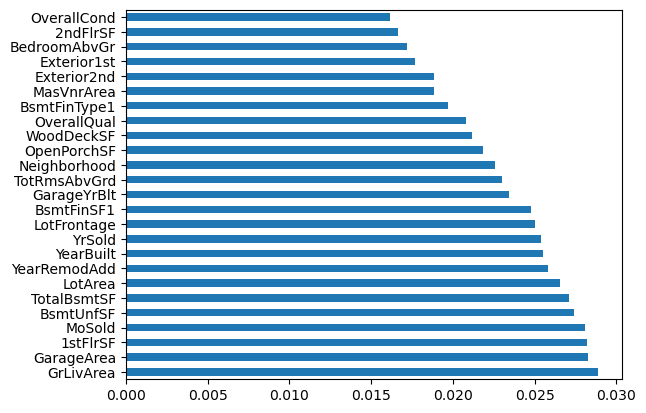

In [118]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

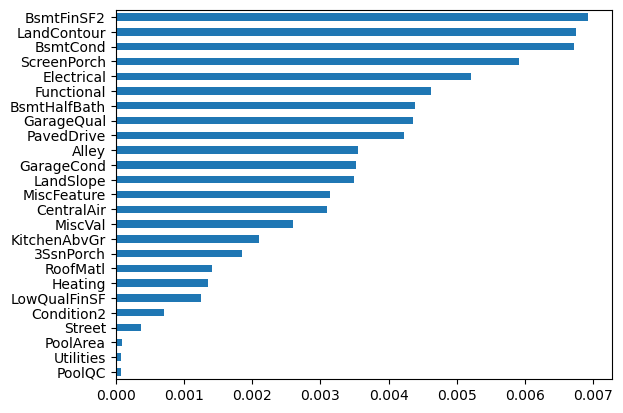

In [119]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.nsmallest(25).plot(kind='barh')
plt.show()

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = X_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(preprocessed_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

### Residuals
By visualizing the residual we can see that is normally distributed (proof of having linear relationship with the dependent variable)
#### [ To Navigation](#Navigation)

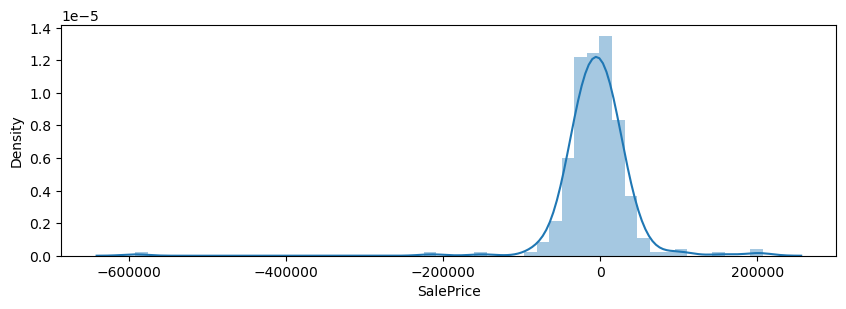

In [125]:
# visualizing residuals
fig = plt.figure(figsize=(10,3))
residuals = (dev_labels- predict_labels)
sns.distplot(residuals)
pass

### Actual Output vs Predicted Output 
measure how far our predictions are from the real house prices.
#### [ To Navigation](#Navigation)

mean_absolute_error: 27426.30389048038
mean_squared_error: 2627314677.028978
root mean_squared_error: 51257.337787179094
explained_variance_score: 0.6128581088253806


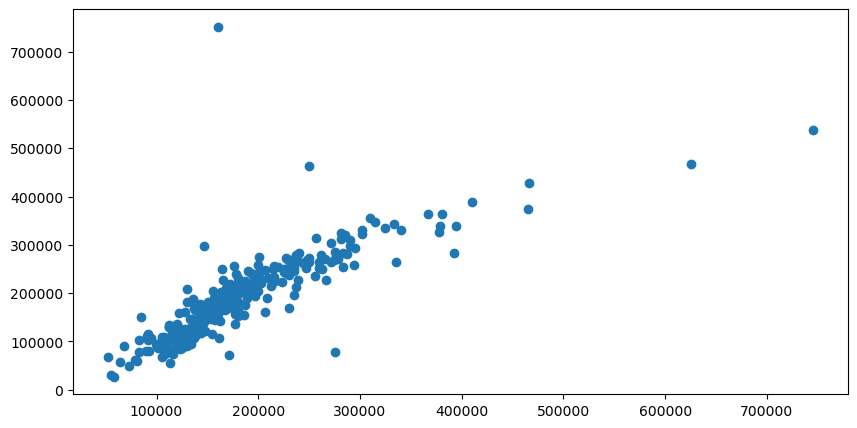

In [126]:
#compare actual output values(dev_labels) with predicted values(predict_labels)
# dev_labels = regressor.predict(preprocessed_X_dev)
df = pd.DataFrame({'Actual': dev_labels, 'Predicted': predict_labels})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('mean_absolute_error:', metrics.mean_absolute_error(dev_labels, predict_labels))  
print('mean_squared_error:', metrics.mean_squared_error(dev_labels, predict_labels))  
print('root mean_squared_error:', np.sqrt(metrics.mean_squared_error(dev_labels, predict_labels)))
print('explained_variance_score:',metrics.explained_variance_score(dev_labels,predict_labels))

# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(dev_labels,predict_labels)

pass